# 投资策略-step1

In [1]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Use 'prophet' instead of 'fbprophet'
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf



/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import requests
import io
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler  # Important import for LSTM

In [3]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as web

# Define the start and end dates
end = datetime.datetime.today()
start = end - datetime.timedelta(days=3*365)  # Approximate 3 years

# Define a function to fetch data from FRED
def fetch_fred_data(symbol):
    try:
        data = web.DataReader(symbol, 'fred', start, end)
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching {symbol} from FRED: {e}")
        return pd.DataFrame()

# Custom fetch for certain indicators that may not work through FRED
def fetch_custom_data(url):
    try:
        response = requests.get(url)
        data = pd.read_csv(io.StringIO(response.text), parse_dates=['DATE'], index_col='DATE')
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching custom data: {e}")
        return pd.DataFrame()

# URLs for custom data
urls = {
    'VIX': 'https://raw.githubusercontent.com/plotly/datasets/master/vix.csv',
}

# Retrieve data for the indicators
indicators = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index
    'PPI': 'PPIACO',    # Producer Price Index
    'Federal Reserve Rate': 'FEDFUNDS',  # Federal Funds Rate
    'Treasury Yields': 'GS10',            # 10-Year Treasury Yield
    'NFP': 'PAYEMS',                      # Non-Farm Payrolls
    'Initial Jobless Claims': 'IC4WSA',  # Initial Jobless Claims
    'Consumer Confidence Index': 'UMCSENT',  # Consumer Confidence
    'Retail Sales Data': 'RSAFS',        # Retail Sales
    'PMI': 'IPMAN',                        # PMI
    'Housing Starts': 'HOUST',            # Housing Starts
    'VIX': '^VIX',                        # Volatility Index
    'PCE': 'PCE'                          # Personal Consumption Expenditures
}

# Create a dictionary to hold the data
data_frames = {}

# Fetch each indicator
for name, symbol in indicators.items():
    if symbol in urls:  # For custom URLs
        data = fetch_custom_data(urls[symbol])
    elif symbol.startswith('^'):  # For stock/market indices, use yfinance
        data = yf.download(symbol, start=start, end=end)['Close']
        data.index = pd.to_datetime(data.index)  # Ensure the index is a DatetimeIndex
        data = data.resample('M').mean()  # Resample to monthly
    else:  # For economic indicators, use FRED
        data = fetch_fred_data(symbol)

    if not data.empty:  # Only add non-empty DataFrames
        data_frames[name] = data

# Combine all data into a single DataFrame
combined_data = pd.concat(data_frames.values(), axis=1)
combined_data.columns = data_frames.keys()

# Display the combined DataFrame
print(combined_data.tail())


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1448082424.py:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean()  # Resample to monthly


                CPI      PPI  Federal Reserve Rate  Treasury Yields       NFP  \
2024-10-31  315.564  253.081                  4.83             4.10  158358.0   
2024-11-30  316.449  253.229                  4.64             4.36  158619.0   
2024-12-31  317.603  253.590                  4.48             4.39  158926.0   
2025-01-31  319.086  257.302                  4.33             4.63  159069.0   
2025-02-28      NaN      NaN                   NaN              NaN       NaN   

            Initial Jobless Claims  Consumer Confidence Index  \
2024-10-31                235937.5                       70.5   
2024-11-30                220600.0                       71.8   
2024-12-31                224937.5                       74.0   
2025-01-31                213125.0                        NaN   
2025-02-28                216500.0                        NaN   

            Retail Sales Data      PMI  Housing Starts        VIX      PCE  
2024-10-31           720393.0  98.9205       

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1448082424.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Fill NaNs with forward fill
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)

# Prepare data for linear regression
X = np.arange(len(combined_data)).reshape(-1, 1)  # Time variable
forecasts = {}

# Linear Regression forecasts
for col in combined_data.columns:
    model = LinearRegression()
    model.fit(X, combined_data[col])
    future_X = np.arange(len(combined_data), len(combined_data) + 12).reshape(-1, 1)
    forecasts[col] = model.predict(future_X)

# Simple Moving Average function
def moving_average(data, window):
    return data.rolling(window=window).mean()

sma_forecasts = {}
# Calculate moving average forecasts
for col in combined_data.columns:
    sma_forecasts[col] = moving_average(combined_data[col], window=12).iloc[-1]  # Last SMA value

# Random Forest forecasts
rf_forecasts = {}
for col in combined_data.columns:
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X, combined_data[col])
    rf_forecasts[col] = model.predict(future_X)

# Final Forecasting (excluding LSTM)
final_forecast = {}

# Assuming equal weights for simplicity
for col in combined_data.columns:
    final_forecast[col] = (forecasts[col] + sma_forecasts[col] + rf_forecasts[col]) / 3  # Exclude LSTM

# Convert to DataFrame for easier viewing
final_forecast_df = pd.DataFrame(final_forecast, index=pd.date_range(start=combined_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))

# Display the final forecast DataFrame
print(final_forecast_df)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1510232854.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


                   CPI         PPI  Federal Reserve Rate  Treasury Yields  \
2025-03-31  318.300399  254.124783              5.180592         4.540136   
2025-04-30  318.575409  253.973876              5.216972         4.555697   
2025-05-31  318.850419  253.822969              5.253353         4.571257   
2025-06-30  319.125430  253.672062              5.289733         4.586818   
2025-07-31  319.400440  253.521154              5.326114         4.602379   
2025-08-31  319.675450  253.370247              5.362494         4.617939   
2025-09-30  319.950460  253.219340              5.398875         4.633500   
2025-10-31  320.225470  253.068433              5.435255         4.649061   
2025-11-30  320.500480  252.917525              5.471636         4.664622   
2025-12-31  320.775490  252.766618              5.508016         4.680182   
2026-01-31  321.050500  252.615711              5.544397         4.695743   
2026-02-28  321.325510  252.464804              5.580777         4.711304   

/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1510232854.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  final_forecast_df = pd.DataFrame(final_forecast, index=pd.date_range(start=combined_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))


In [5]:
# Define major industry indices symbols
industry_indices = {
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI',
    'NASDAQ': '^IXIC',
    'Russell 2000': '^RUT',
    'Financials': 'XLF',
    'Healthcare': 'XLV',
    'Technology': 'XLK',
    'Communication': 'XLC',
    'Consumer Staple': 'XLP',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Real Estate': 'XLRE',
    'Energy':'XLE',
    'Utilities':'XLU',
    'Consumer Discretionary': 'XLY',
    'Gold':'GLD',
    'Long China' : 'MCHI',
    'Crude oil' : 'USO',
    'military': 'ITA'
}

# Fetch industry indices data
for name, symbol in industry_indices.items():
    data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
    if not data.empty:
        data_frames[name] = data

# Combine all data into a single DataFrame again
#industry_data = pd.concat(data_frames.values(), axis=1)
#industry_data.columns = data_frames.keys()

# Display the updated combined DataFrame
#print(industry_data.tail())


[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1775380162.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1775380162.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
[*********************100%***********************]  1 of 1 completed
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1775380162.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = yf.download(symbol, start=start, end=end)['Close'].resample('M').mean()
[***

In [6]:
# Combine industry indices into the existing combined_data
for name, data in data_frames.items():
    combined_data[name] = data

# Drop NaNs by forward filling or interpolation
combined_data.fillna(method='ffill', inplace=True)
combined_data.dropna(inplace=True)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/2630337843.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


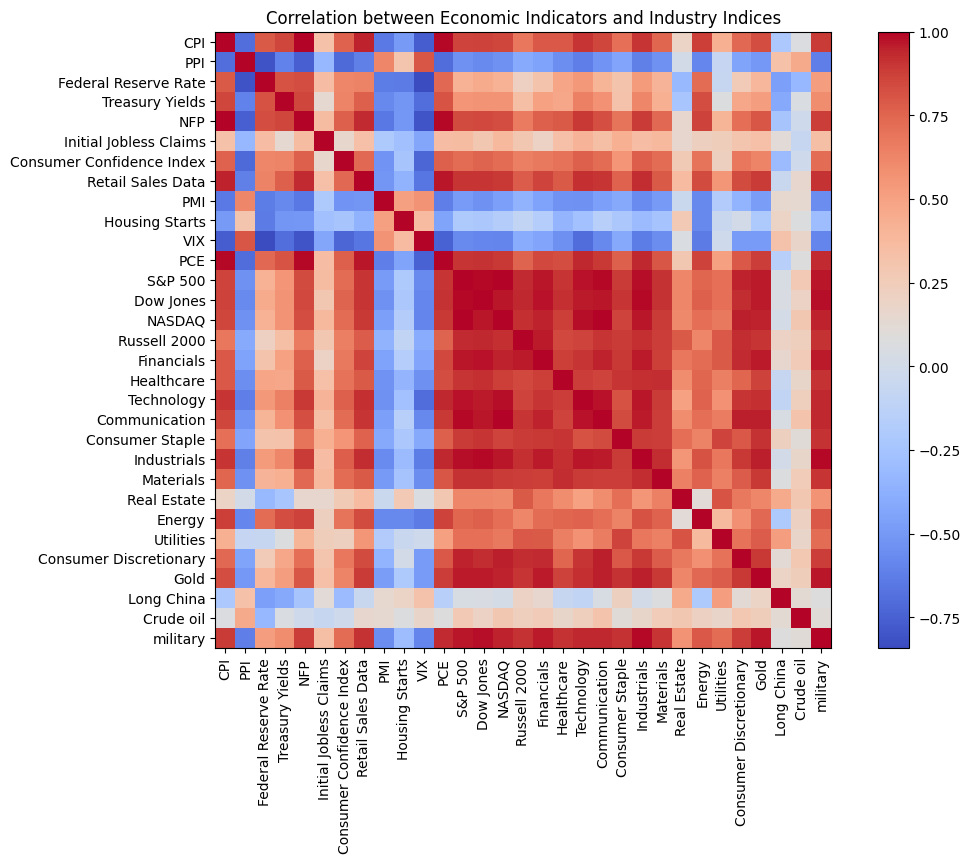

S&P 500 - R²: -0.37465013062859853, MAE: 224.24502467754382, MSE: 62960.944257509735
S&P 500 CAGR: 11.35%


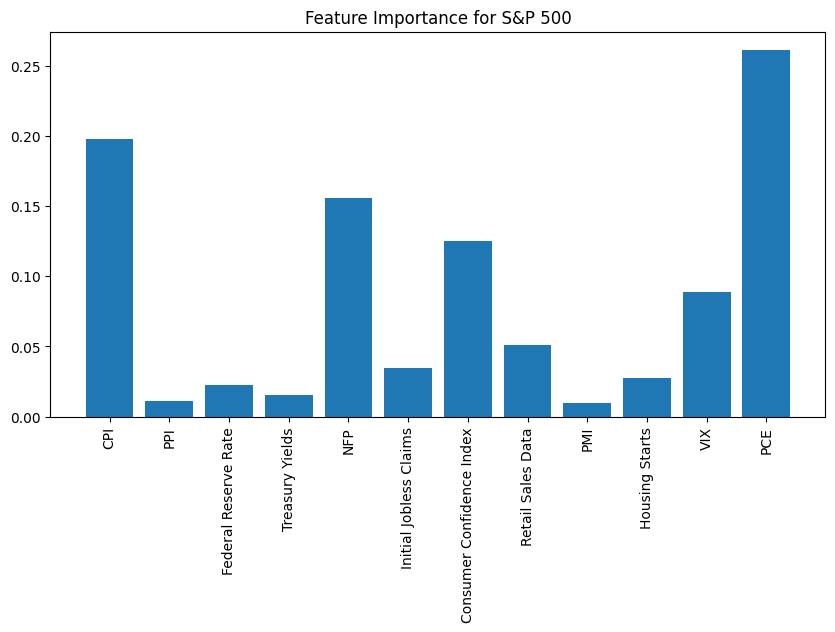

Dow Jones - R²: -7.154618636002544, MAE: 4411.379088973107, MSE: 20122393.569234714
Dow Jones CAGR: 9.40%


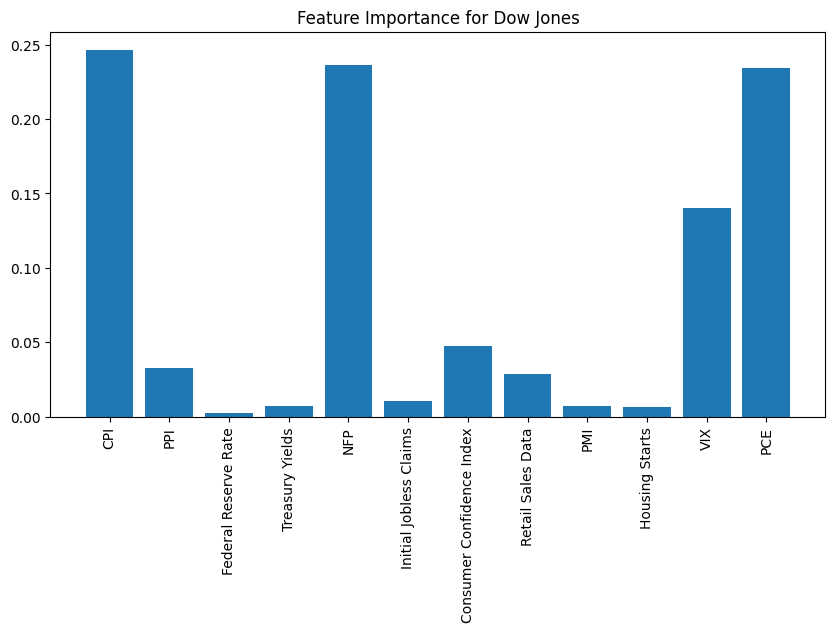

NASDAQ - R²: 0.5241092383996802, MAE: 526.7677782058345, MSE: 405419.2384867214
NASDAQ CAGR: 13.09%


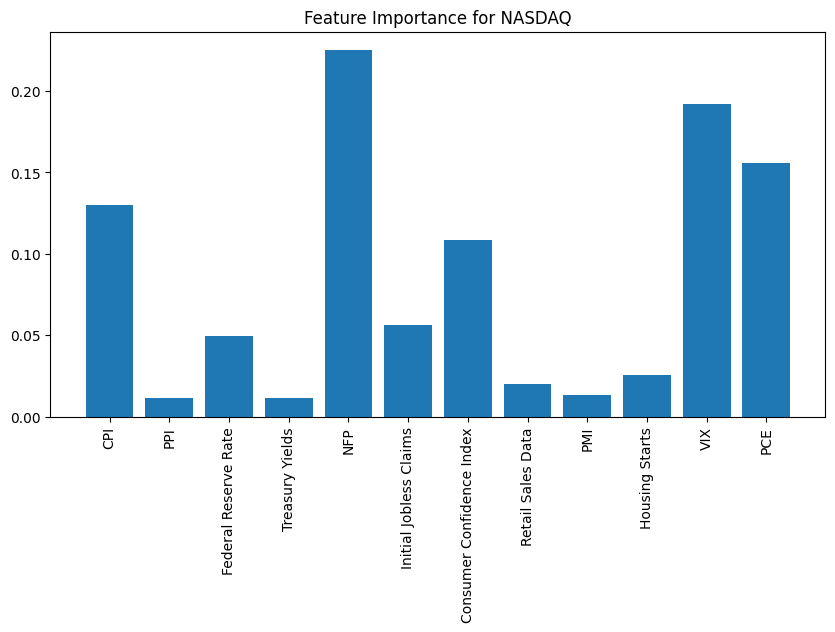

Russell 2000 - R²: -11.451762773264614, MAE: 262.0118691717633, MSE: 71156.10434706681
Russell 2000 CAGR: 3.88%


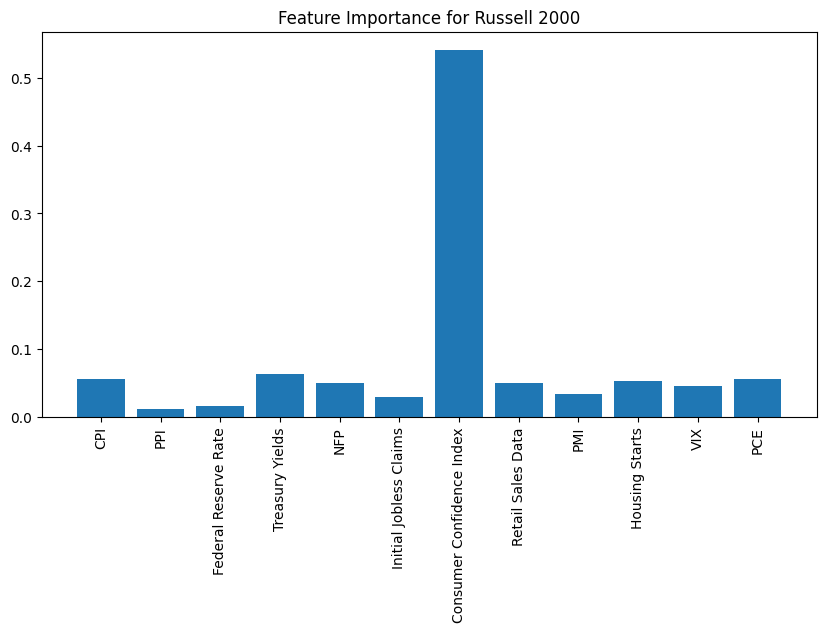

Financials - R²: -4.371304027421944, MAE: 7.2395151290433235, MSE: 55.10160673794533
Financials CAGR: 12.70%


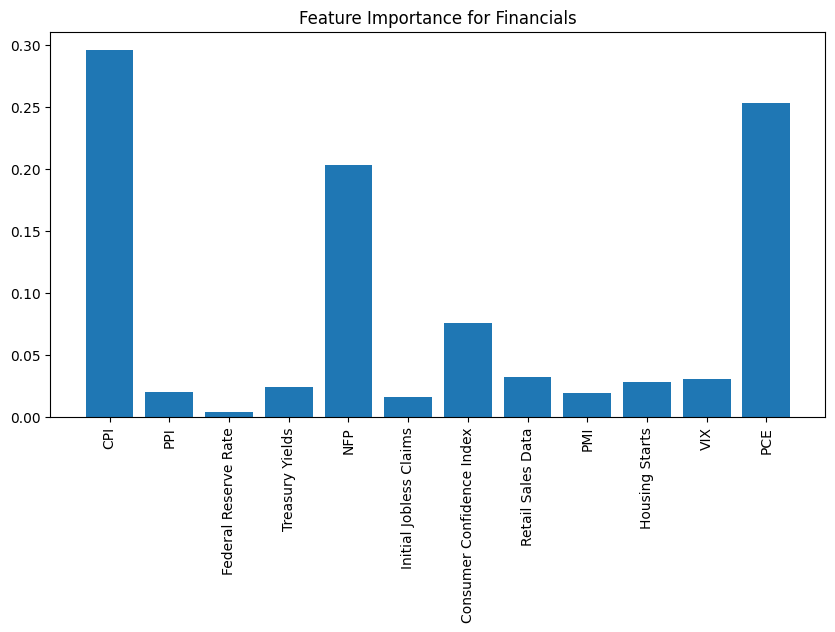

Healthcare - R²: -7.22966981444314, MAE: 9.831237848116693, MSE: 147.924325514886
Healthcare CAGR: 4.78%


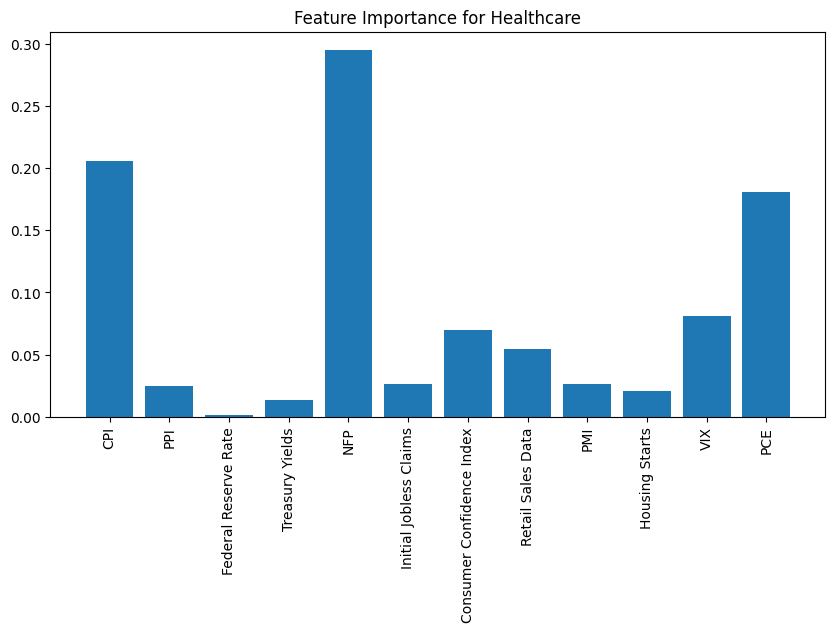

Technology - R²: -4.69128687898139, MAE: 15.956469375036725, MSE: 358.60658061725167
Technology CAGR: 16.43%


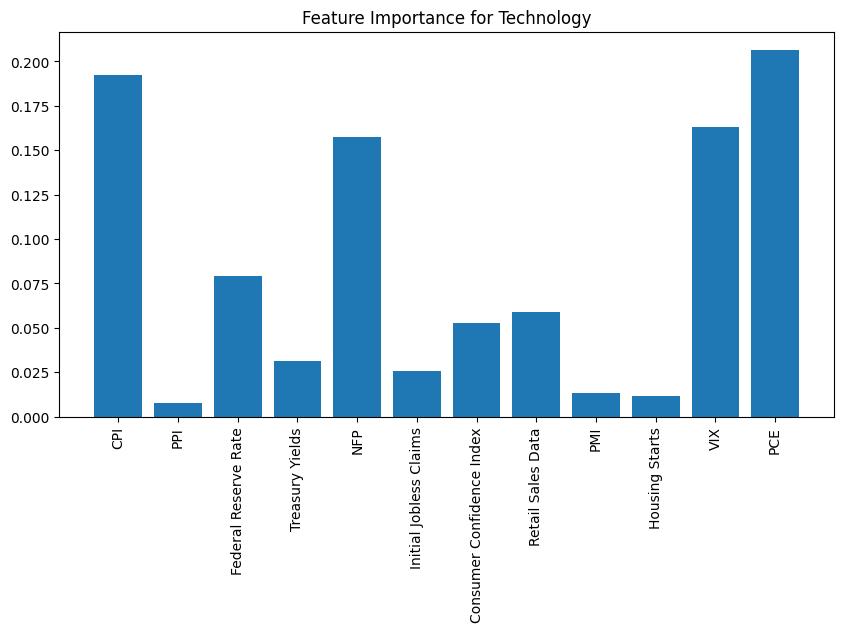

Communication - R²: 0.11208873152175092, MAE: 5.452873052343001, MSE: 39.078912347578736
Communication CAGR: 16.58%


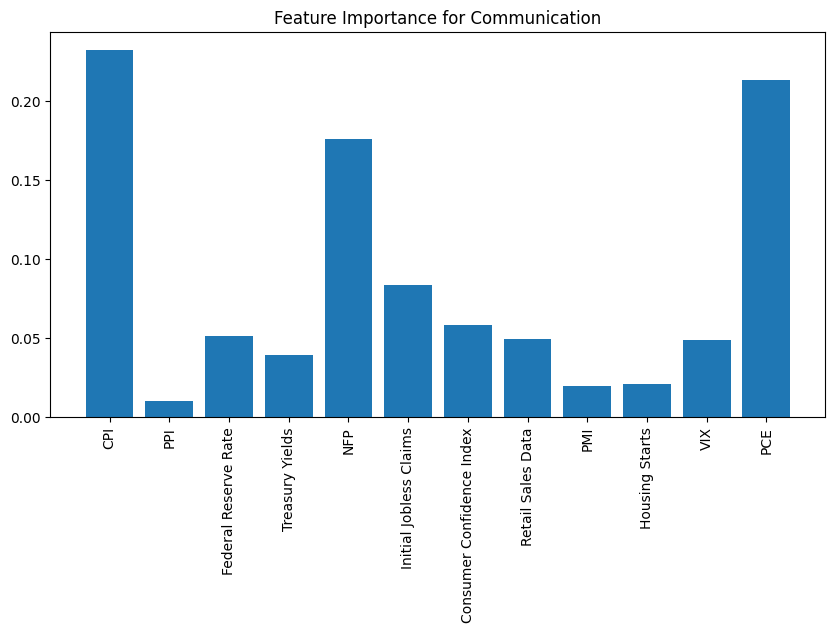

Consumer Staple - R²: -24.32180957247089, MAE: 8.104294840326057, MSE: 72.64352221386898
Consumer Staple CAGR: 5.17%


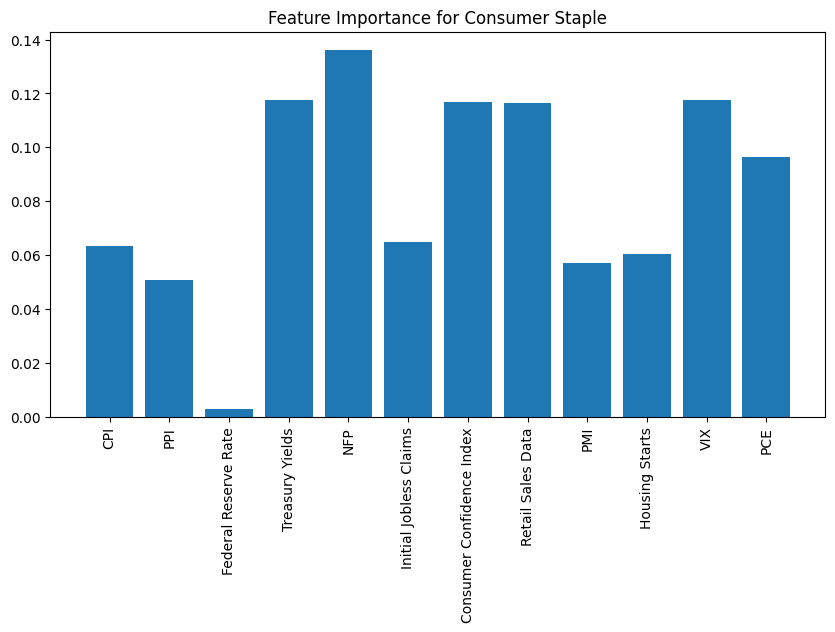

Industrials - R²: -3.1062745759137442, MAE: 11.057898085614399, MSE: 133.97259924654074
Industrials CAGR: 12.62%


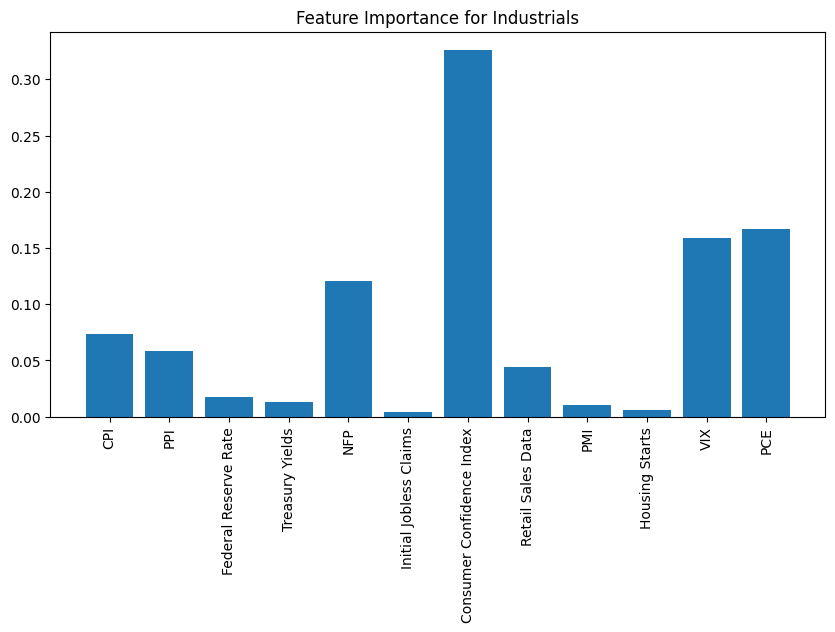

Materials - R²: -2.0907308662188924, MAE: 3.2781733729838294, MSE: 20.842316470524935
Materials CAGR: 3.72%


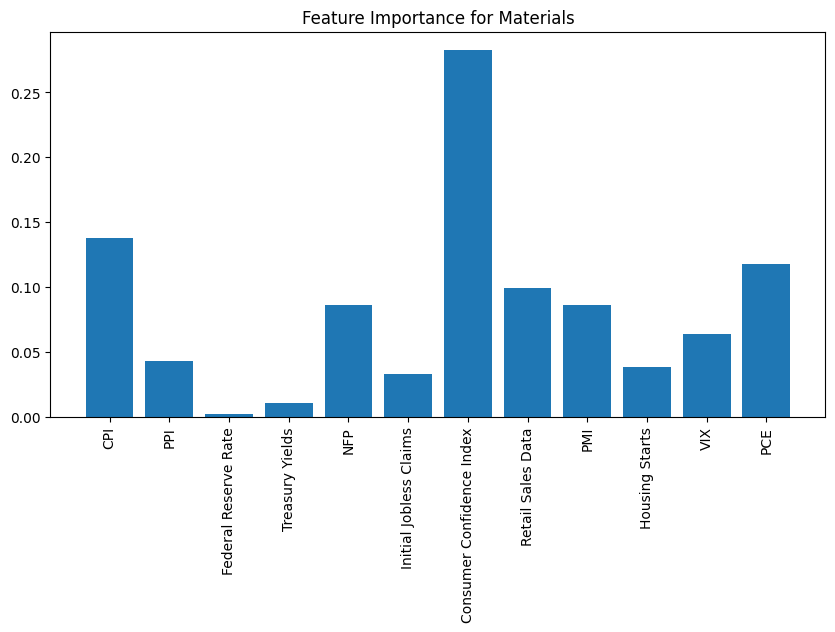

Real Estate - R²: -16.924336097953038, MAE: 5.694822542648106, MSE: 37.54955808433536
Real Estate CAGR: -0.18%


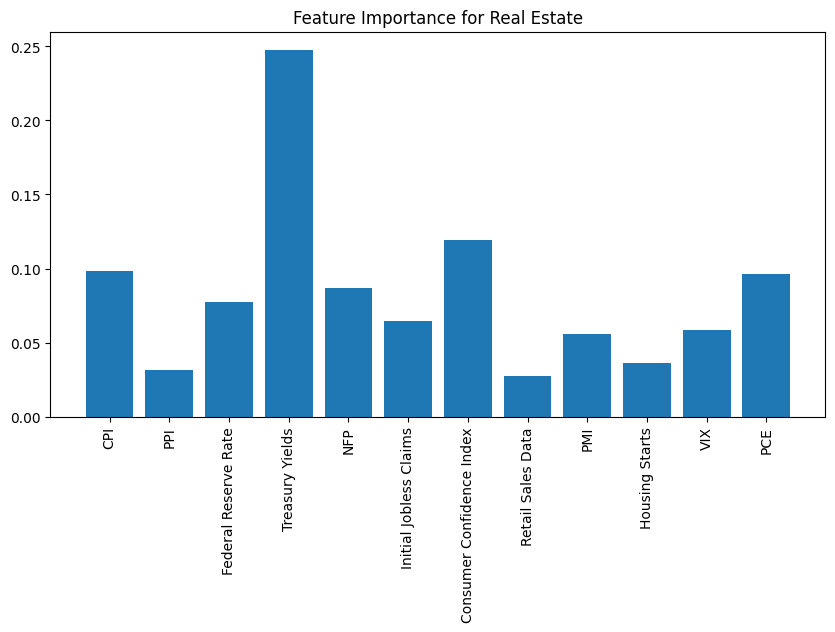

Energy - R²: -20.599156768902837, MAE: 9.430834956563151, MSE: 93.60909642971292
Energy CAGR: 9.78%


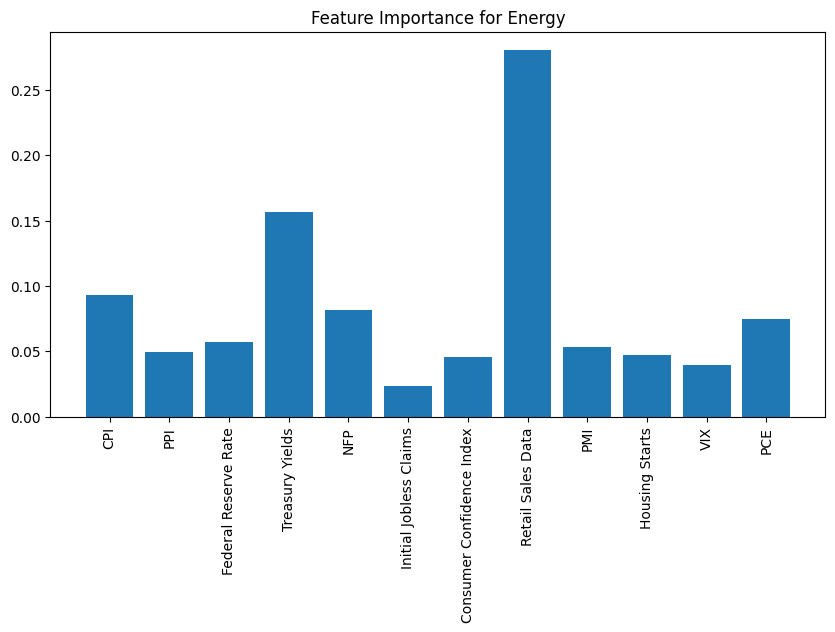

Utilities - R²: -18.34312966282676, MAE: 13.643318101489598, MSE: 220.90517899203562
Utilities CAGR: 6.56%


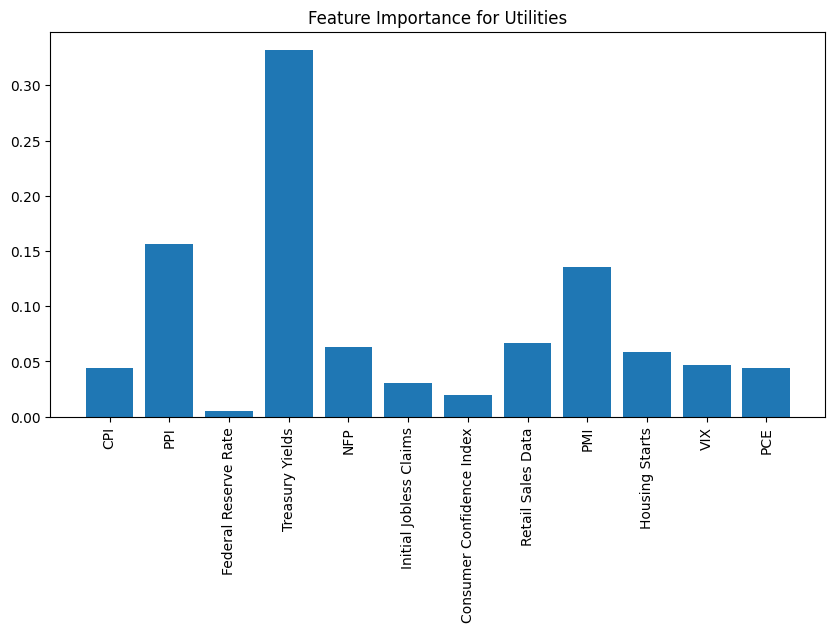

Consumer Discretionary - R²: -0.5038035527499447, MAE: 22.655596942302147, MSE: 538.1527301304236
Consumer Discretionary CAGR: 9.65%


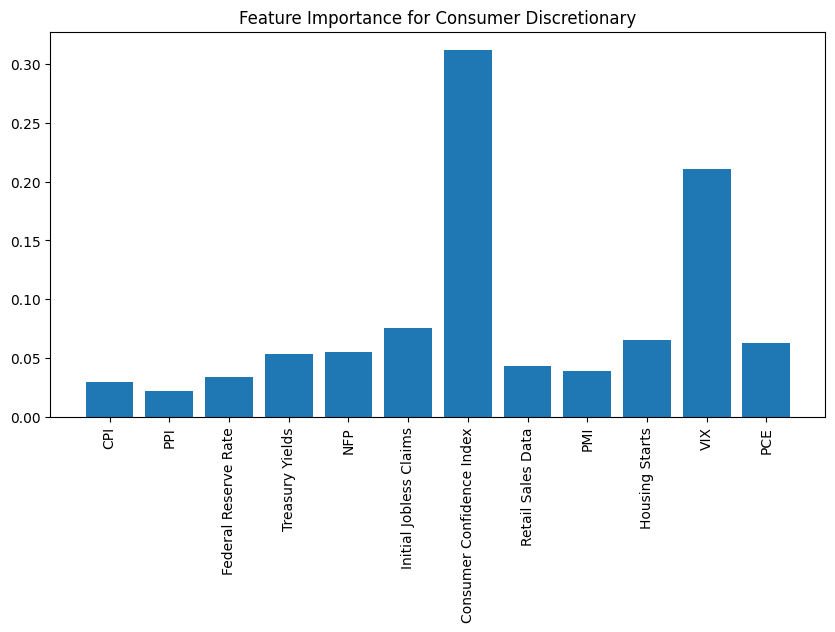

Gold - R²: 0.30039245889803035, MAE: 8.390865399851709, MSE: 112.81135149034267
Gold CAGR: 13.37%


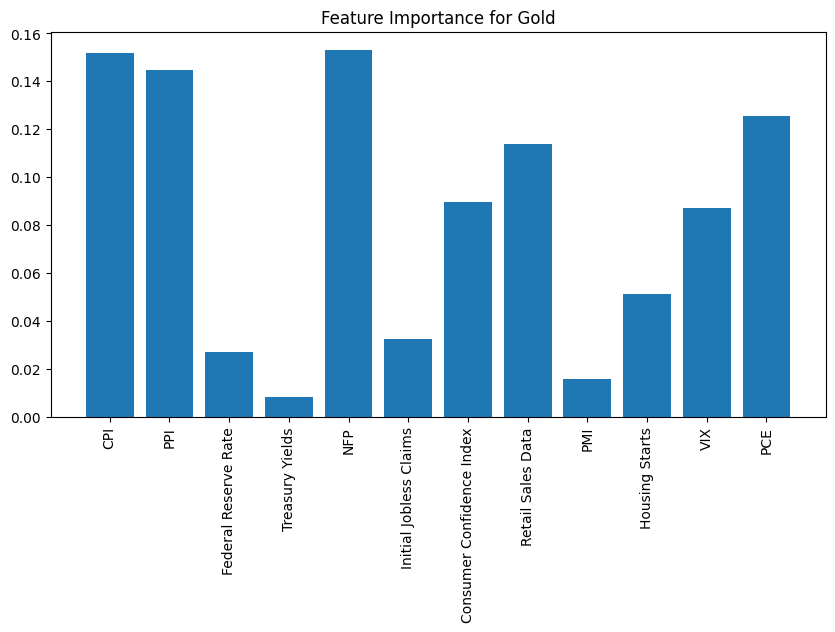

Long China - R²: -2.5997743699079834, MAE: 5.915435059061974, MSE: 46.68156669916188
Long China CAGR: 0.61%


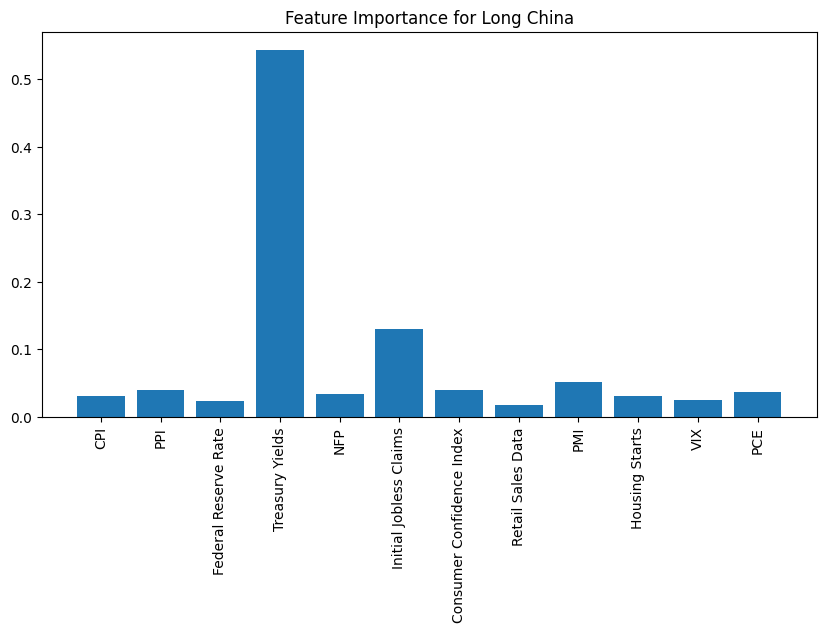

Crude oil - R²: -2.6439700455425177, MAE: 5.060775592415721, MSE: 33.504497600262255
Crude oil CAGR: 0.15%


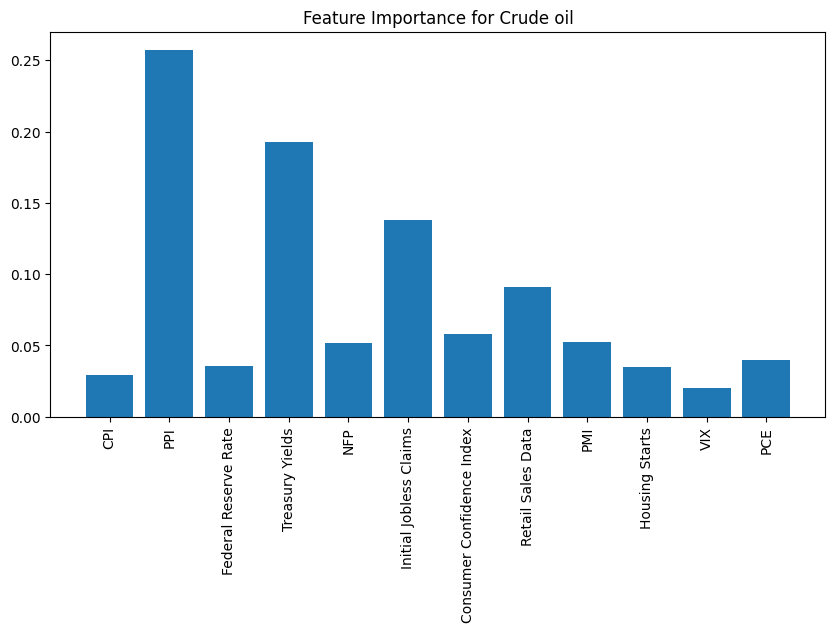

military - R²: -6.416811614676872, MAE: 16.051562817729643, MSE: 289.91036462986574
military CAGR: 13.70%


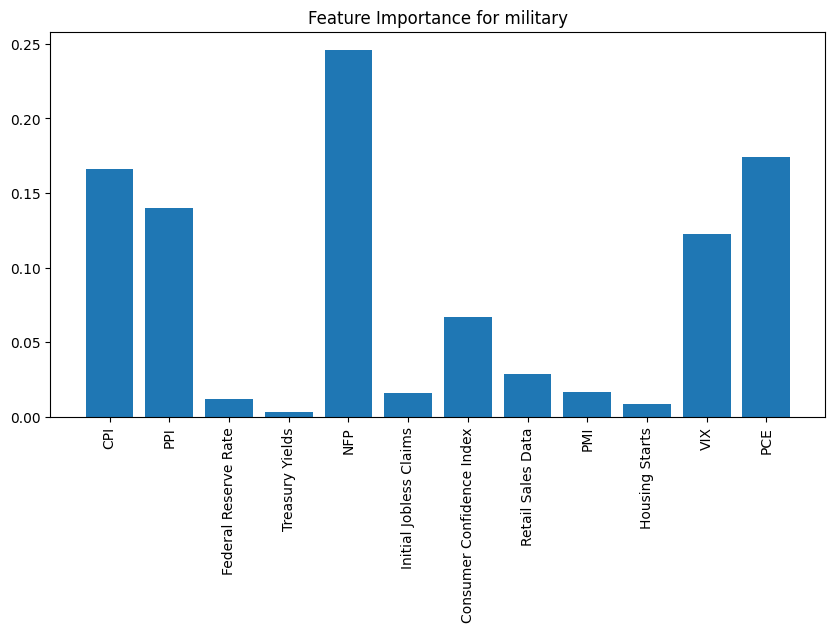

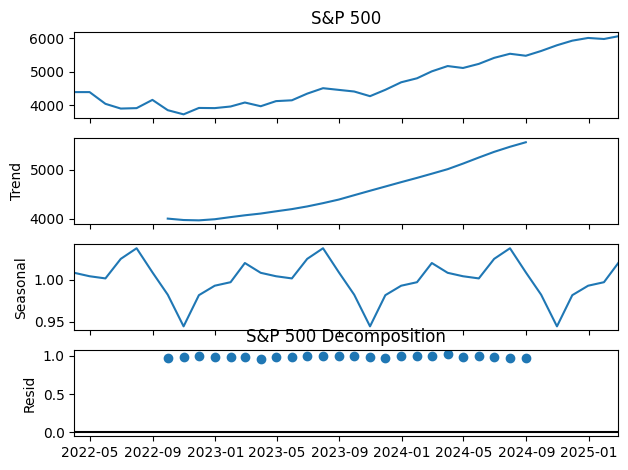

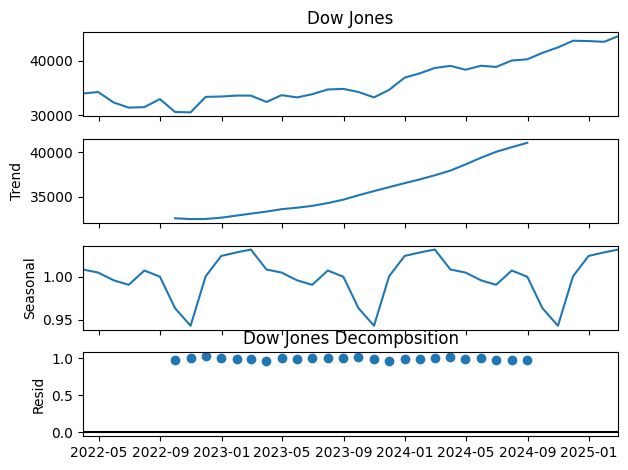

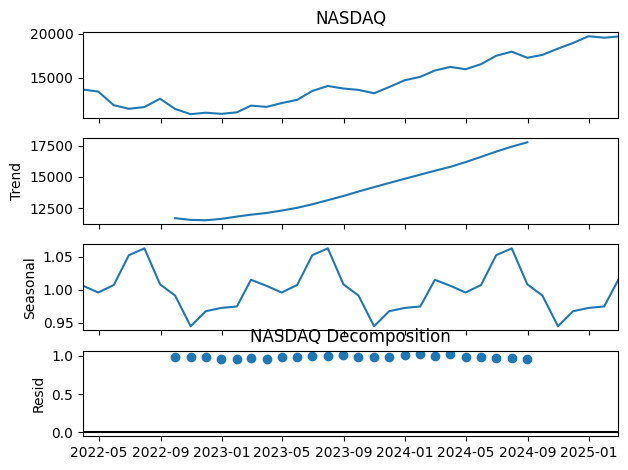

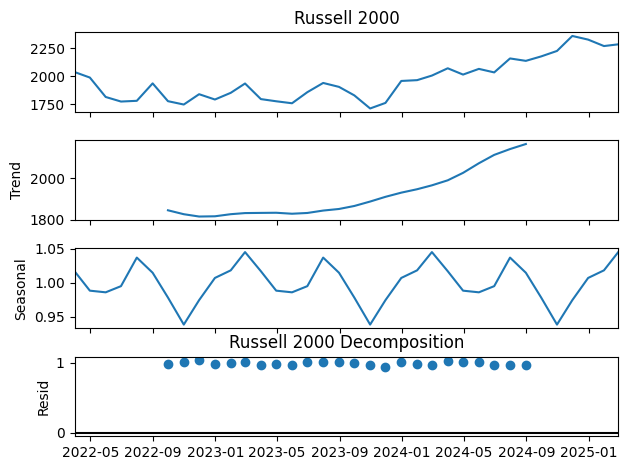

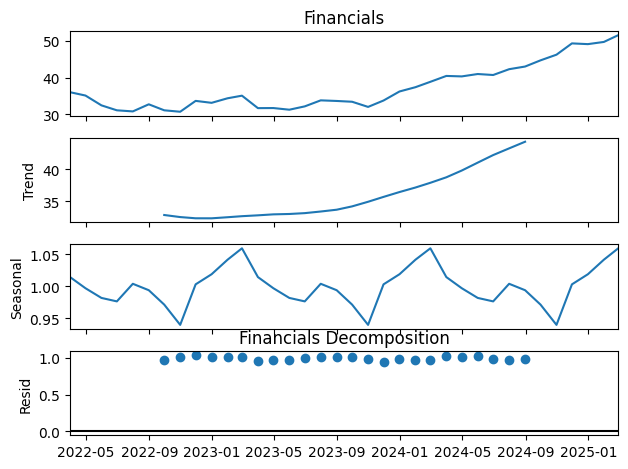

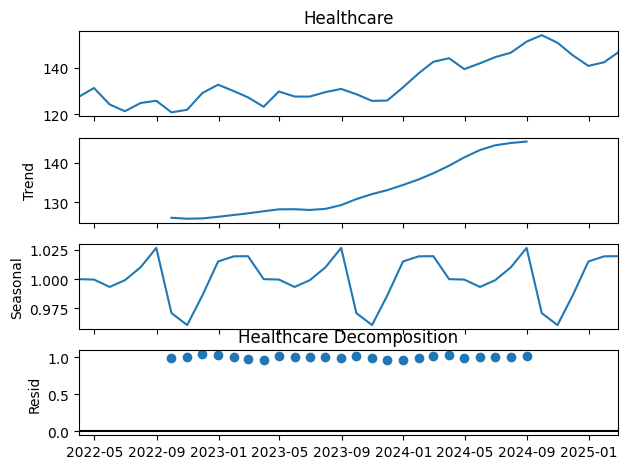

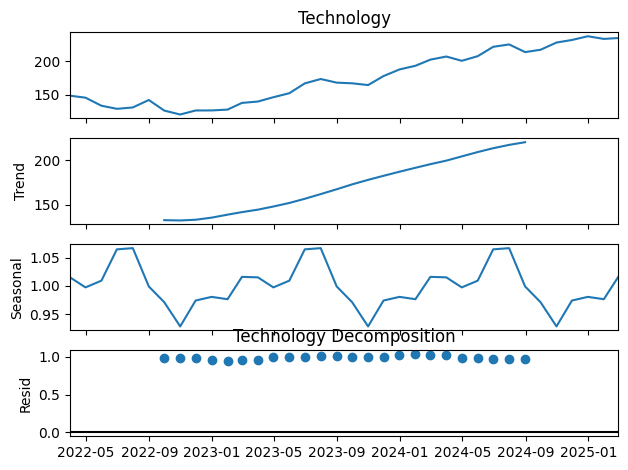

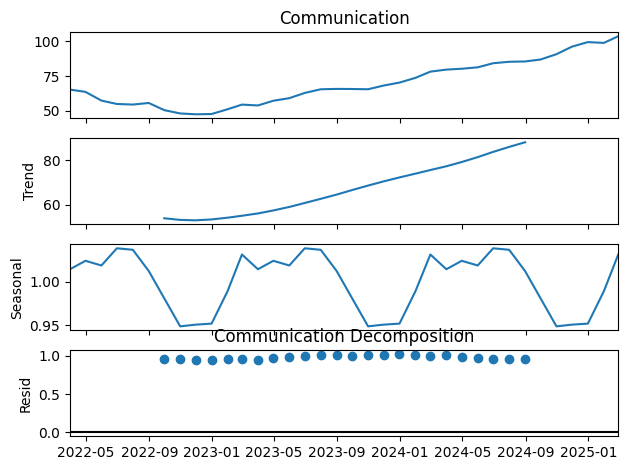

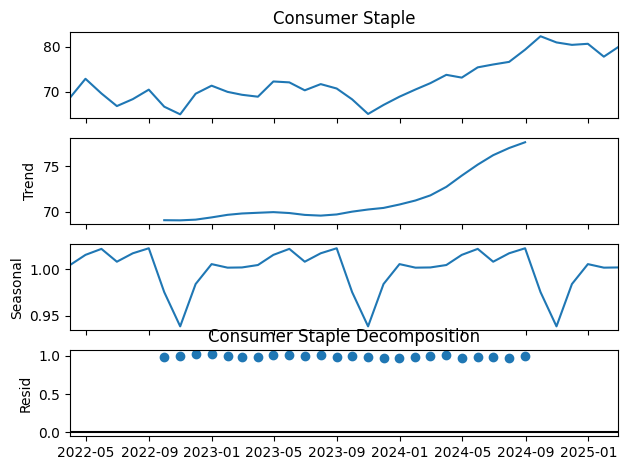

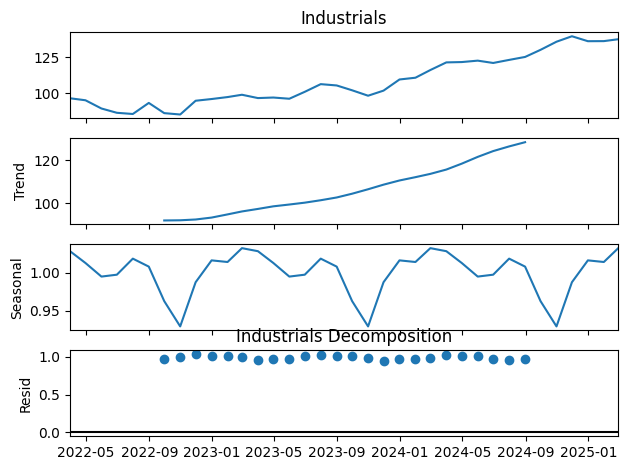

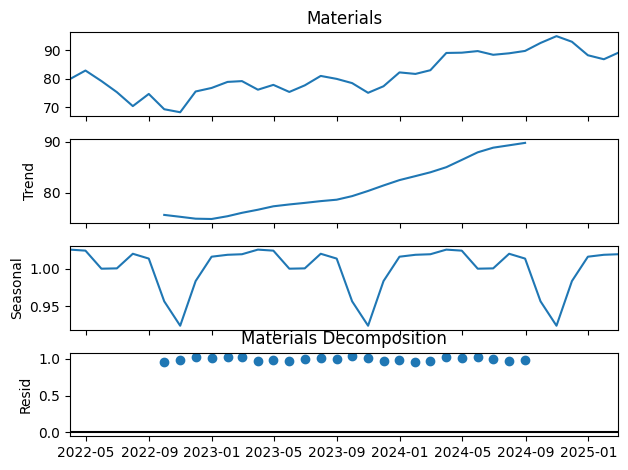

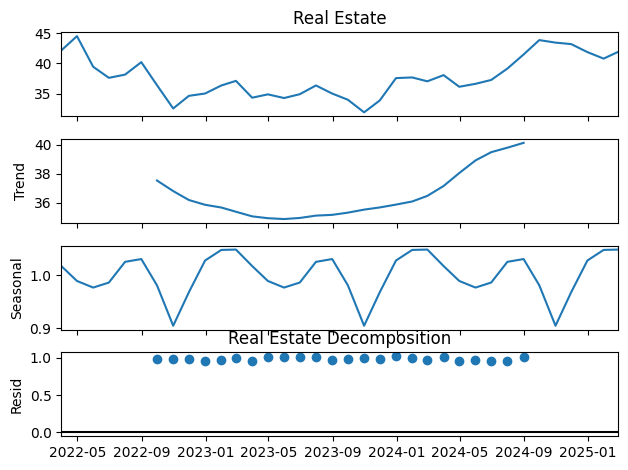

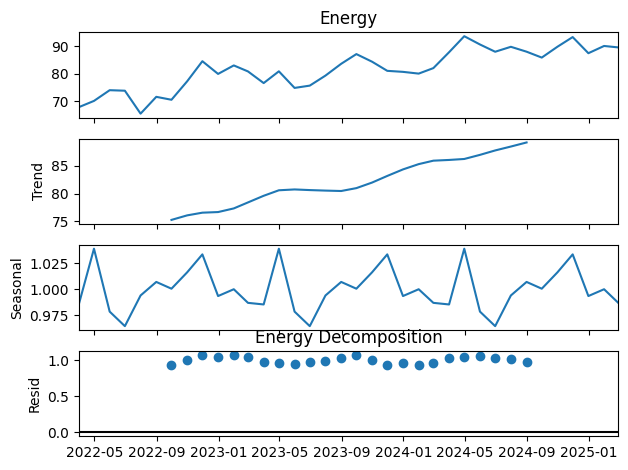

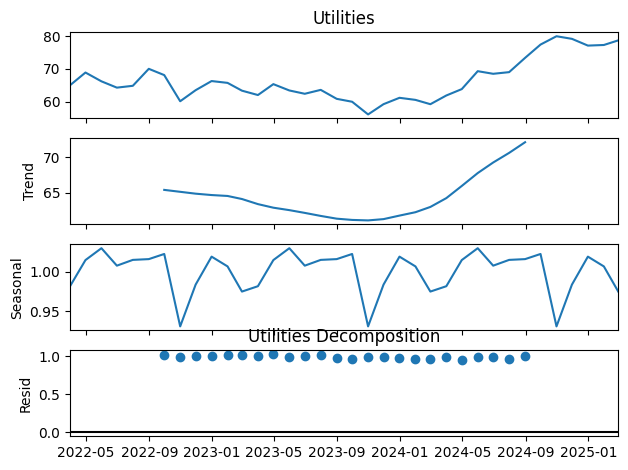

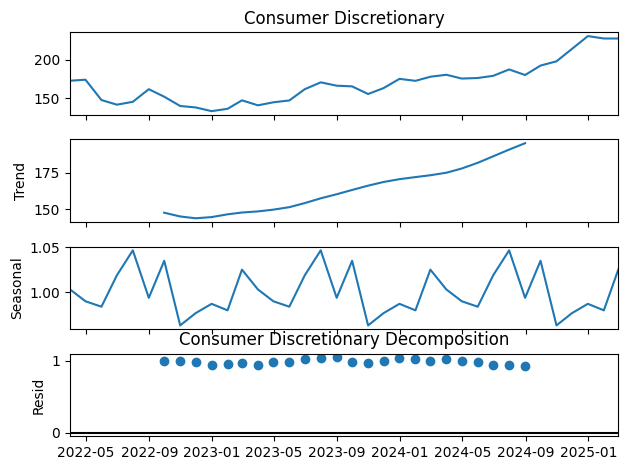

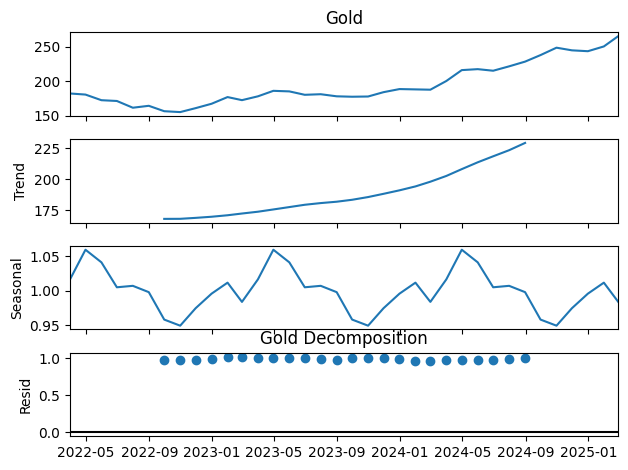

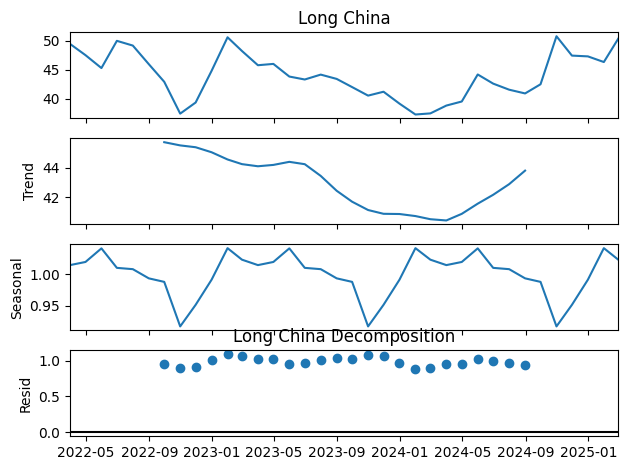

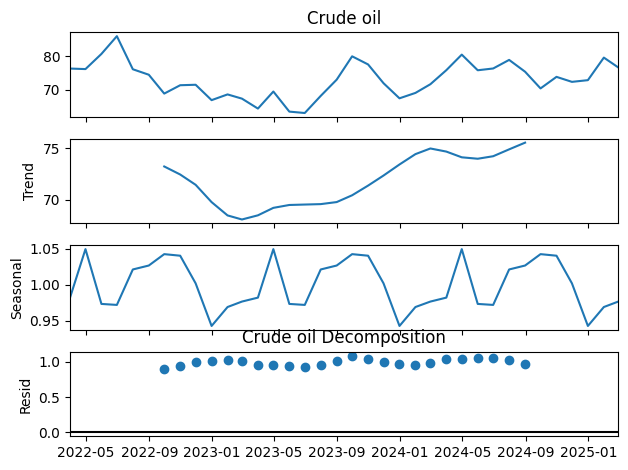

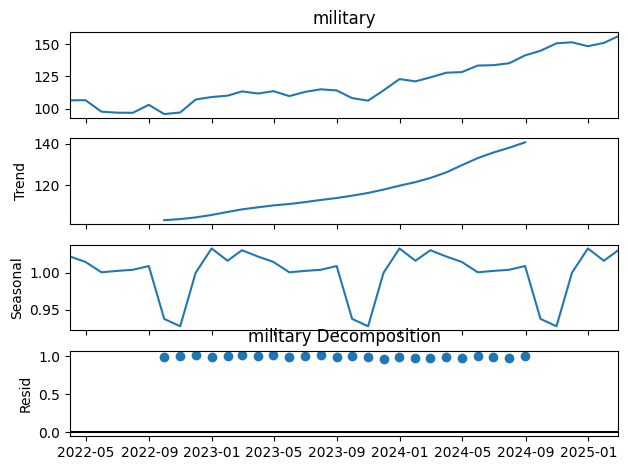

Granger Causality for S&P 500
CPI: p-values = [np.float64(0.0145), np.float64(0.001)]
PPI: p-values = [np.float64(0.5437), np.float64(0.8354)]
Federal Reserve Rate: p-values = [np.float64(0.0), np.float64(0.0012)]
Treasury Yields: p-values = [np.float64(0.0585), np.float64(0.0982)]
NFP: p-values = [np.float64(0.7908), np.float64(0.0934)]
Initial Jobless Claims: p-values = [np.float64(0.7278), np.float64(0.875)]
Consumer Confidence Index: p-values = [np.float64(0.1228), np.float64(0.0021)]
Retail Sales Data: p-values = [np.float64(0.003), np.float64(0.0533)]
PMI: p-values = [np.float64(0.0466), np.float64(0.0031)]
Housing Starts: p-values = [np.float64(0.6423), np.float64(0.9392)]
VIX: p-values = [np.float64(0.82), np.float64(0.6642)]
PCE: p-values = [np.float64(0.5664), np.float64(0.7997)]
Granger Causality for Dow Jones
CPI: p-values = [np.float64(0.0086), np.float64(0.0002)]
PPI: p-values = [np.float64(0.582), np.float64(0.7207)]
Federal Reserve Rate: p-values = [np.float64(0.0), np.

/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print 

Housing Starts: p-values = [np.float64(0.8526), np.float64(0.8054)]
VIX: p-values = [np.float64(0.3633), np.float64(0.0816)]
PCE: p-values = [np.float64(0.5501), np.float64(0.7057)]
Granger Causality for Gold
CPI: p-values = [np.float64(0.0882), np.float64(0.0537)]
PPI: p-values = [np.float64(0.8055), np.float64(0.129)]
Federal Reserve Rate: p-values = [np.float64(0.0), np.float64(0.0009)]
Treasury Yields: p-values = [np.float64(0.1851), np.float64(0.4049)]
NFP: p-values = [np.float64(0.3826), np.float64(0.409)]
Initial Jobless Claims: p-values = [np.float64(0.3818), np.float64(0.4944)]
Consumer Confidence Index: p-values = [np.float64(0.2671), np.float64(0.2614)]
Retail Sales Data: p-values = [np.float64(0.0056), np.float64(0.0913)]
PMI: p-values = [np.float64(0.0643), np.float64(0.0562)]
Housing Starts: p-values = [np.float64(0.7967), np.float64(0.6796)]
VIX: p-values = [np.float64(0.6105), np.float64(0.6392)]
PCE: p-values = [np.float64(0.6783), np.float64(0.7958)]
Granger Causality

/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Volumes/Outlier/Models/Xiaomi-TransMLA/.venv/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests

# Correlation matrix
corr_matrix = combined_data.corr()

# Plot heatmap using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation between Economic Indicators and Industry Indices')
plt.show()

# Initialize results
industry_forecast_results = {}
industry_growth_results = {}
feature_importance_results = {}

# Define function to calculate CAGR
def calculate_cagr(industry_data, years):
    start_value = industry_data.iloc[0]
    end_value = industry_data.iloc[-1]
    cagr = (end_value / start_value) ** (1 / years) - 1
    return cagr

# Define the number of years of data based on monthly data
years_of_data = len(combined_data) / 12  # Assuming monthly data

# Loop over each industry to compute forecast results and growth
for industry in industry_indices.keys():
    y = combined_data[industry]
    X = combined_data[indicators.keys()]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store R², MAE, and MSE scores
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    industry_forecast_results[industry] = {'r2': r2, 'mae': mae, 'mse': mse}
    print(f"{industry} - R²: {r2}, MAE: {mae}, MSE: {mse}")
    
    # Calculate and store CAGR
    industry_growth_results[industry] = calculate_cagr(combined_data[industry], years_of_data)
    print(f"{industry} CAGR: {industry_growth_results[industry]:.2%}")
    
    # Train Random Forest model to get feature importance
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    feature_importance_results[industry] = dict(zip(X.columns, importances))
    
    # Plot feature importances
    plt.figure(figsize=(10, 5))
    plt.bar(X.columns, importances)
    plt.title(f'Feature Importance for {industry}')
    plt.xticks(rotation=90)
    plt.show()

# Seasonal decomposition for each industry
for industry in industry_indices.keys():
    result = seasonal_decompose(combined_data[industry], model='multiplicative', period=12)
    result.plot()
    plt.title(f'{industry} Decomposition')
    plt.show()

# Granger causality tests
for industry in industry_indices.keys():
    print(f"Granger Causality for {industry}")
    for indicator in indicators.keys():
        test = grangercausalitytests(combined_data[[indicator, industry]], maxlag=2, verbose=False)
        p_values = [round(test[i+1][0]['ssr_chi2test'][1], 4) for i in range(2)]
        print(f'{indicator}: p-values = {p_values}')

# Create composite score based on R², feature importance, and CAGR
composite_scores = {}

for industry in industry_indices.keys():
    r2 = industry_forecast_results[industry]['r2']
    cagr = industry_growth_results[industry]
    feature_importance_sum = sum(feature_importance_results[industry].values())  # Sum of feature importance
    
    # Composite score (adjust weights as needed)
    composite_score = 0.5 * r2 + 0.3 * feature_importance_sum + 0.2 * cagr
    composite_scores[industry] = composite_score

# Rank industries based on composite score
ranked_industries = sorted(composite_scores.items(), key=lambda x: x[1], reverse=True)

# Select top 3 industries
top_3_industries = [industry for industry, score in ranked_industries[:3]]
print(f"Top 3 promising industries: {top_3_industries}")


In [8]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as web
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end dates
end = datetime.datetime.today()
start = end - datetime.timedelta(days=3*365)  # Approximate 3 years

# Define a function to fetch data from FRED
def fetch_fred_data(symbol):
    try:
        data = web.DataReader(symbol, 'fred', start, end)
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching {symbol} from FRED: {e}")
        return pd.DataFrame()

# Custom fetch for certain indicators that may not work through FRED
def fetch_custom_data(url):
    try:
        response = requests.get(url)
        data = pd.read_csv(io.StringIO(response.text), parse_dates=['DATE'], index_col='DATE')
        return data.resample('M').mean()  # Resample to monthly data
    except Exception as e:
        print(f"Error fetching custom data: {e}")
        return pd.DataFrame()

# URLs for custom data
urls = {
    'VIX': 'https://raw.githubusercontent.com/plotly/datasets/master/vix.csv',
}

# Retrieve data for the indicators
indicators = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index
    'PPI': 'PPIACO',    # Producer Price Index
    'Federal Reserve Rate': 'FEDFUNDS',  # Federal Funds Rate
    'Treasury Yields': 'GS10',            # 10-Year Treasury Yield
    'NFP': 'PAYEMS',                      # Non-Farm Payrolls
    'Initial Jobless Claims': 'IC4WSA',  # Initial Jobless Claims
    'Consumer Confidence Index': 'UMCSENT',  # Consumer Confidence
    'Retail Sales Data': 'RSAFS',        # Retail Sales
    'PMI': 'IPMAN',                        # PMI
    'Housing Starts': 'HOUST',            # Housing Starts
    'VIX': '^VIX',                        # Volatility Index
    'PCE': 'PCE'                          # Personal Consumption Expenditures
}

# Industry indices
industry_indices = {
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI',
    'NASDAQ': '^IXIC',
    'Russell 2000': '^RUT',
    'Financials': 'XLF',
    'Healthcare': 'XLV',
    'Technology': 'XLK',
    'Communication': 'XLC',
    'Consumer Staple': 'XLP',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Real Estate': 'XLRE',
    'Energy':'XLE',
    'Utilities':'XLU',
    'Consumer Discretionary': 'XLY',
    'Gold':'GLD',
    'Long China' : 'MCHI',
    'Military': 'ITA'
}

# Create a dictionary to hold the data
data_frames = {}

# Fetch each indicator
for name, symbol in indicators.items():
    if symbol in urls:  # For custom URLs
        data = fetch_custom_data(urls[symbol])
    elif symbol.startswith('^'):  # For stock/market indices, use yfinance
        data = yf.download(symbol, start=start, end=end)['Close']
        data.index = pd.to_datetime(data.index)  # Ensure the index is a DatetimeIndex
        data = data.resample('M').mean()  # Resample to monthly
    else:  # For economic indicators, use FRED
        data = fetch_fred_data(symbol)

    if not data.empty:  # Only add non-empty DataFrames
        data_frames[name] = data

# Fetch industry indices data from yfinance
industry_data_frames = {}
for name, symbol in industry_indices.items():
    data = yf.download(symbol, start=start, end=end)['Close']
    data.index = pd.to_datetime(data.index)  # Ensure the index is a DatetimeIndex
    data = data.resample('M').mean()  # Resample to monthly
    if not data.empty:
        industry_data_frames[name] = data

# Combine all indicator data into a single DataFrame
indicators_data = pd.concat(data_frames.values(), axis=1)
indicators_data.columns = data_frames.keys()

# Combine all industry indices data into a single DataFrame
industry_data = pd.concat(industry_data_frames.values(), axis=1)
industry_data.columns = industry_data_frames.keys()
indicators_data_lagged = indicators_data.shift(1).dropna()

# Step 3: Normalization of both the indicators and industry indices using percentage changes
indicators_data_pct = indicators_data_lagged.pct_change().dropna()  # Percentage changes for indicators
industry_data_pct = industry_data.pct_change().dropna()              # Percentage changes for industries

# Step 4: Align the datasets to have the same time index
combined_data = pd.concat([industry_data_pct, indicators_data_pct], axis=1).dropna()

# Step 5: Train-Test Split
X = combined_data[indicators.keys()]
Y = combined_data[industry_indices.keys()]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Step 6: Model Training - Random Forest Regressor for each industry
future_returns = {}
for industry in Y.columns:
    rf = RandomForestRegressor(n_estimators=100000, random_state=42)
    rf.fit(X_train, Y_train[industry])
    
    # Predicting future values
    predictions = rf.predict(X_test)
    
    # Capture the average predicted return for future periods
    predicted_return = np.mean(predictions)
    
    future_returns[industry] = predicted_return

# Step 7: Display results - Sort by predicted future returns
future_returns_sorted = sorted(future_returns.items(), key=lambda x: x[1], reverse=True)
print("Most Promising Industries based on Predicted Returns:")
for industry, predicted_return in future_returns_sorted:
    print(f"{industry}: Predicted Return = {predicted_return:.4f}")
    


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/198133957.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/198133957.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/198133957.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/198133957.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample('M').mean()  # Resample to monthly data
/var/folders/m6/wxc9fp79

Most Promising Industries based on Predicted Returns:
Communication: Predicted Return = 0.0295
Technology: Predicted Return = 0.0256
NASDAQ: Predicted Return = 0.0222
S&P 500: Predicted Return = 0.0158
Utilities: Predicted Return = 0.0152
Gold: Predicted Return = 0.0148
Energy: Predicted Return = 0.0119
Financials: Predicted Return = 0.0096
Industrials: Predicted Return = 0.0093
Healthcare: Predicted Return = 0.0091
Dow Jones: Predicted Return = 0.0088
Consumer Staple: Predicted Return = 0.0087
Materials: Predicted Return = 0.0086
Consumer Discretionary: Predicted Return = 0.0075
Military: Predicted Return = 0.0070
Russell 2000: Predicted Return = 0.0006
Real Estate: Predicted Return = -0.0011
Long China: Predicted Return = -0.0025


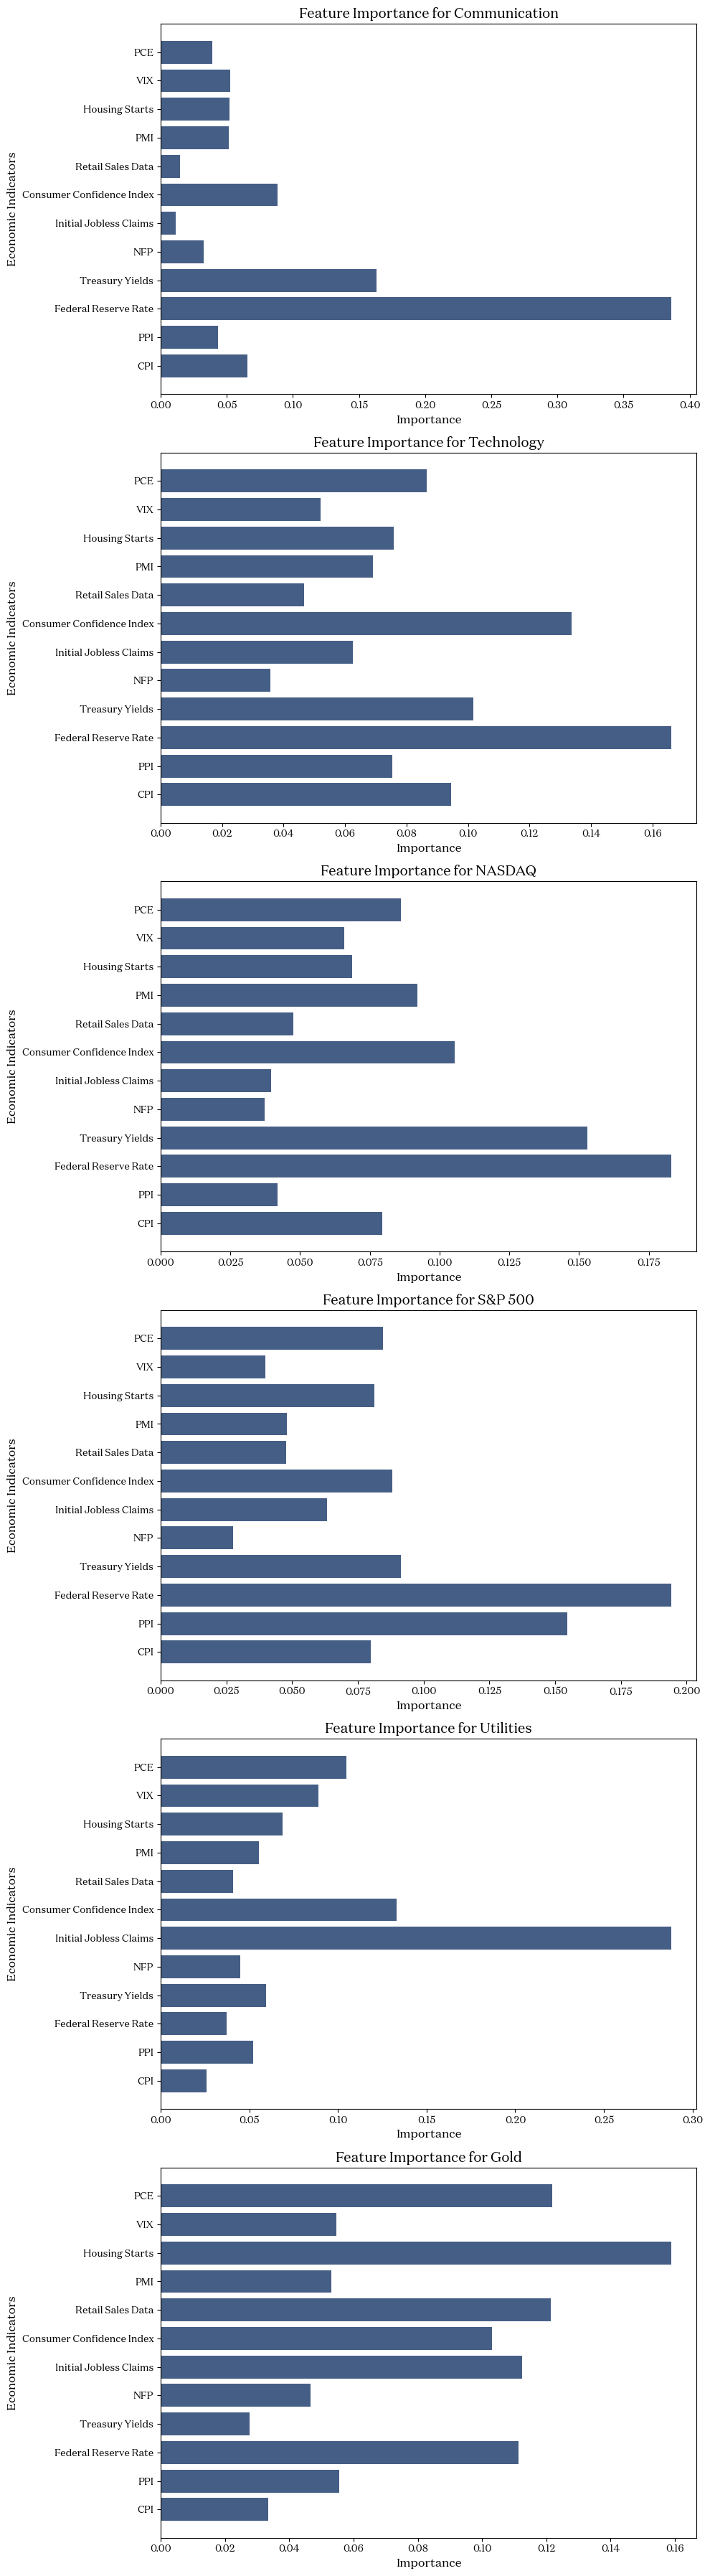

In [9]:
import matplotlib.pyplot as plt

# Get the top 5 industries based on predicted returns
top_5_industries = [industry for industry, _ in future_returns_sorted[:6]]

# Create a plot for feature importance for each of the top 5 industries
plt.figure(figsize=(10, 6 * len(top_5_industries)))  # Increase figure size for multiple plots

for i, industry in enumerate(top_5_industries):
    # Train the model for the current industry
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, Y_train[industry])
    
    # Get the feature importance for this industry
    importance = rf.feature_importances_
    
    # Create a subplot for each industry
    plt.subplot(len(top_5_industries), 1, i + 1)
    plt.barh(X.columns, importance, color='#455E86')  # Updated bar color
    plt.title(f'Feature Importance for {industry}', fontname='Domaine Text', fontsize=14, color='black')
    plt.xlabel('Importance', fontname='Domaine Text', fontsize=12, color='black')
    plt.ylabel('Economic Indicators', fontname='Domaine Text', fontsize=12, color='black')
    plt.xticks(fontname='Domaine Text', fontsize=10, color='black')
    plt.yticks(fontname='Domaine Text', fontsize=10, color='black')
    plt.gca().set_facecolor('none')  # Transparent background for the plot area

plt.tight_layout()
plt.savefig('top_5_feature_importance.png', transparent=True)  # Save with transparent background
plt.show()


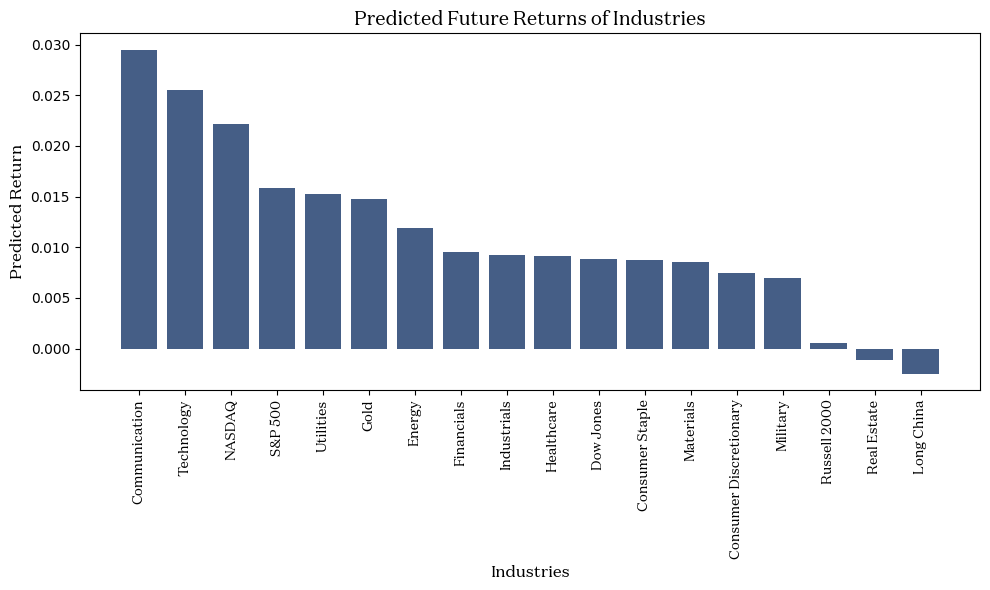

In [10]:
import matplotlib.pyplot as plt

# Create bar plot for predicted future returns of industries
industries = [item[0] for item in future_returns_sorted]
predicted_returns = [item[1] for item in future_returns_sorted]

plt.figure(figsize=(10,6))
plt.bar(industries, predicted_returns, color='#455E86')  # Updated bar color
plt.title('Predicted Future Returns of Industries', fontname='Domaine Text', fontsize=14, color='black')
plt.xlabel('Industries', fontname='Domaine Text', fontsize=12, color='black')
plt.ylabel('Predicted Return', fontname='Domaine Text', fontsize=12, color='black')
plt.xticks(rotation=90, fontname='Domaine Text', fontsize=10, color='black')
plt.tight_layout()
plt.gca().set_facecolor('none')  # Transparent background for the plot area
plt.savefig('predicted_returns.png', transparent=True)  # Save with transparent background
plt.show()



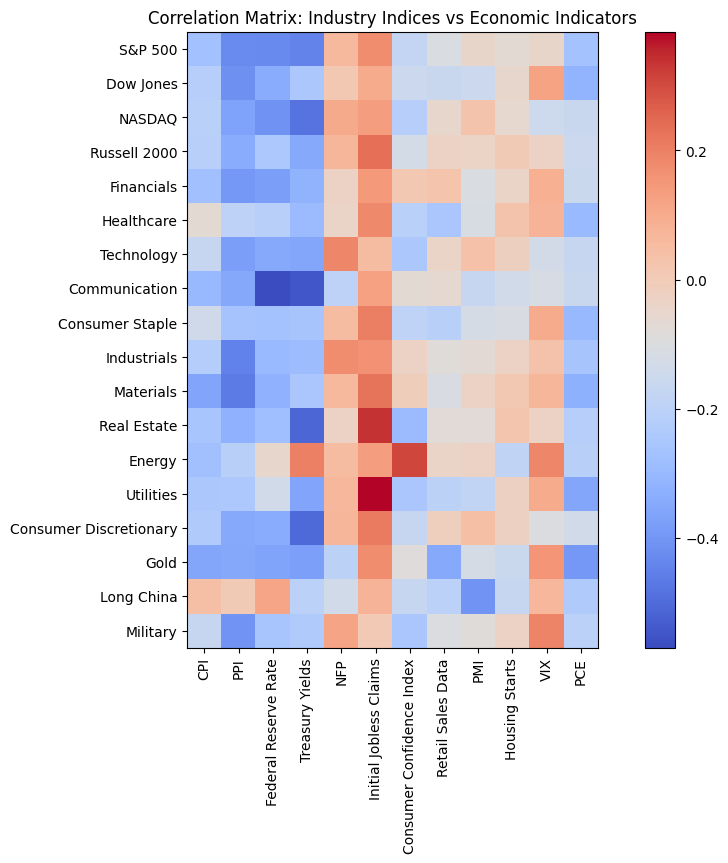

                             CPI       PPI  Federal Reserve Rate  \
S&P 500                -0.271708 -0.427204             -0.431429   
Dow Jones              -0.219184 -0.414319             -0.340501   
NASDAQ                 -0.205994 -0.365455             -0.408581   
Russell 2000           -0.212836 -0.339579             -0.242101   
Financials             -0.275305 -0.393466             -0.377655   
Healthcare             -0.067460 -0.197156             -0.212564   
Technology             -0.163781 -0.378121             -0.348442   
Communication          -0.299947 -0.352405             -0.569797   
Consumer Staple        -0.140581 -0.261149             -0.266494   
Industrials            -0.223205 -0.449876             -0.295758   
Materials              -0.359161 -0.462026             -0.323627   
Real Estate            -0.256581 -0.321749             -0.279114   
Energy                 -0.275421 -0.210199             -0.051545   
Utilities              -0.249198 -0.242284      

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a correlation matrix between the industry indices and economic indicators
correlation_matrix = combined_data.corr()

# Extract correlation matrix between industry indices and economic indicators
industry_economic_correlation = correlation_matrix.loc[industry_indices.keys(), indicators.keys()]

# Plotting the heatmap using matplotlib with transparent background
fig, ax = plt.subplots(figsize=(12, 8), facecolor='none')  # Set the figure background to transparent

# Plot the heatmap
cax = ax.imshow(industry_economic_correlation, cmap='coolwarm', interpolation='none')

# Add colorbar
fig.colorbar(cax)

# Add labels for x and y axes
ax.set_xticks(np.arange(len(indicators.keys())))
ax.set_yticks(np.arange(len(industry_indices.keys())))
ax.set_xticklabels(indicators.keys(), rotation=90, color='black')  # Set x-axis labels to black
ax.set_yticklabels(industry_indices.keys(), color='black')          # Set y-axis labels to black

# Set the title with black font color
ax.set_title('Correlation Matrix: Industry Indices vs Economic Indicators', color='black')

# Ensure the axes background is transparent
ax.set_facecolor('none')

# Display the heatmap
plt.show()

# Print the correlation matrix as a table
print(industry_economic_correlation)

plt.savefig('heatmap.png', transparent=True)

https://stockanalysis.com/stocks/sector/technology/

https://www.sectorspdrs.com/mainfund/XLK

https://www.invesco.com/us/financial-products/etfs/holdings?audienceType=Institutional&ticker=PGJ

https://finance.yahoo.com/quote/USO/

In [12]:
import pandas as pd

# Load the CSV files
file_paths = [
    'index-holdings-xly.csv',
    'index-holdings-xlk.csv',
    'index-holdings-xle.csv',
    'index-holdings-xlc.csv'
]

# Create an empty list to store all tickers
all_tickers = []

# Process each file and extract tickers
for file_path in file_paths:
    df = pd.read_csv(file_path)
    # Assuming the tickers are in the first column (index 0)
    tickers = df.iloc[:, 0].tolist()
    all_tickers.extend(tickers)

# Append the provided tickers to the list
additional_tickers = [
    'NEM', 'AEM', 'GOLD', 'WPM', 'FNV', 'GFI', 'KGC', 'AU', 'RGLD', 'PAAS', 'AGI', 'HMY',
    'BTG', 'OR', 'EGO', 'IAG', 'CDE', 'EQX', 'NGD', 'SAND', 'SA', 'FSM', 'CGAU', 'ORLA', 
    'NG', 'SSRM', 'DRD', 'ARMN', 'NFGC', 'IAUX', 'GAU', 'CMCL', 'CTGO', 'GROY', 'CNL', 
    'DC', 'IDR', 'ODV', 'GLDG', 'THM', 'TRX', 'VGZ', 'USAU', 'HYMC', 'GORO', 'AUST', 'PZG'
]

all_tickers.extend(additional_tickers)

# Remove any potential duplicates by converting to a set, then back to a list
tickers = list(set(all_tickers))

# Display the result to the user
tickers = [ticker for ticker in all_tickers if ticker not in ['Symbol', 'CNL']]



In [13]:
data = yf.download(tickers, period="2y")  # 5 years of data for earnings growth, etc.

Failed to get ticker 'DIS' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/DIS?range=1d&interval=1d&crumb=loI9uItf3mw (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_DECODE_ERROR] tlsv1 alert decode error (_ssl.c:1000)')))
[*********************100%***********************]  209 of 209 completed

1 Failed download:
['MRO']: YFPricesMissingError('possibly delisted; no price data found  (period=2y) (Yahoo error = "No data found, symbol may be delisted")')


In [14]:
import yfinance as yf
import pandas as pd

# Sample list of tickers
# tickers = ['AAPL', 'AMD', 'AMZN', 'ARKK', 'ASML', 'AVGO', 'CRM', 'GOOG', 'INTC', 'JPM', 'META', 'MSFT', 'MU', 'NVDA', 'TSLA', 'TSM', 'UNG', 'VGT', 'XLF', 'XOM']

def check_200dma_cross(ticker):
    try:
        stock = yf.download(ticker, period="1y", interval="1d")
        
        # Check if the downloaded data is empty or insufficient
        if stock.empty or len(stock) < 200:
            print(f"Skipping {ticker}: Not enough data or data is empty.")
            return None
        
        stock['200DMA'] = stock['Close'].rolling(window=200).mean()
        
        # Avoid FutureWarning by using iloc to access the last elements by position
        if stock['Close'].iloc[-1] > stock['200DMA'].iloc[-1]:  # Price above 200DMA
            return ticker
        return None
    except Exception as e:
        print(f"Skipping {ticker}: {str(e)}")
        return None


selected_stocks = [check_200dma_cross(ticker) for ticker in tickers]
selected_stocks = list(filter(None, selected_stocks))

print("Stocks crossing 200-day moving average:", selected_stocks)


[*********************100%***********************]  1 of 1 completed


Skipping AMZN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TSLA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MCD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LOW: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping BKNG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TJX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SBUX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NKE: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CMG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ORLY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MAR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ABNB: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HLT: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DHI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AZO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ROST: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping RCL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LEN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping F: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping YUM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LULU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TSCO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EBAY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PHM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NVR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GRMN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DECK: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CCL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GPC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EXPE: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DRI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping APTV: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping BBY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LVS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ULTA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DPZ: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping POOL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping KMX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NCLH: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TPR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LKQ: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CZR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HAS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MGM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping WYNN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MHK: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping RL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping BWA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AAPL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NVDA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MSFT: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AVGO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CRM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ORCL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AMD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ACN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CSCO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ADBE: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping IBM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping QCOM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NOW: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TXN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping INTU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AMAT: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PANW: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ADI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ANET: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping INTC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LRCX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping KLAC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PLTR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping APH: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MSI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SNPS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CRWD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CDNS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ADSK: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ROP: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NXPI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FTNT: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FICO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TEL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MPWR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MCHP: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping IT: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CTSH: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HPQ: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DELL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GLW: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ON: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CDW: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ANSS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping KEYS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HPE: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NTAP: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TYL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SMCI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping STX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GDDY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PTC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping WDC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FSLR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TDY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TER: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ZBRA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AKAM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping VRSN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SWKS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TRMB: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GEN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping JBL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping JNPR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FFIV: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ENPH: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EPAM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping QRVO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping XOM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CVX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping COP: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping WMB: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EOG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SLB: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping OKE: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PSX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MPC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping KMI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping VLO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HES: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping BKR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TRGP: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping OXY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FANG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DVN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HAL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EQT: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CTRA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MRO']: YFPricesMissingError('possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")')


Skipping MRO: Not enough data or data is empty.


[*********************100%***********************]  1 of 1 completed


Skipping APA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping META: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GOOGL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GOOG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NFLX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TMUS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DIS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CMCSA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping T: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TTWO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping VZ: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CHTR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping OMC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping LYV: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping WBD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping IPG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NWSA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping MTCH: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FOXA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PARA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FOX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NWS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NEM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AEM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GOLD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping WPM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FNV: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GFI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping KGC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping RGLD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping PAAS: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AGI: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HMY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping BTG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping OR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EGO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping IAG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CDE: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping EQX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NGD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SAND: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping FSM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CGAU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ORLA: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping SSRM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DRD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ARMN: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping NFGC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping IAUX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GAU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CMCL: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping CTGO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GROY: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping DC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping IDR: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping ODV: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GLDG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping THM: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping TRX: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping VGZ: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping USAU: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping HYMC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping GORO: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed


Skipping AUST: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


[*********************100%***********************]  1 of 1 completed

Skipping PZG: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
Stocks crossing 200-day moving average: []


In [15]:
# Example stock list (tickers can be changed as needed)

# Downloading stock data
# data = yf.download(tickers, period="5y")  # 5 years of data for earnings growth, etc.

def paul_tudor_jones_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_200 = stock_data.rolling(window=200).mean()
        
        if stock_data[-1] > 1.3* ma_200[-1]:  # Latest price above the 200-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

# Select stocks based on this criterion
paul_tudor_jones_stocks = paul_tudor_jones_selection(data)
print("Paul Tudor Jones selected stocks:", paul_tudor_jones_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/3466763151.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > 1.3* ma_200[-1]:  # Latest price above the 200-day MA


Paul Tudor Jones selected stocks: ['TSLA', 'RCL', 'CCL', 'EXPE', 'TPR', 'RL', 'AVGO', 'PLTR', 'CRWD', 'FTNT', 'JBL', 'FFIV', 'TRGP', 'EQT', 'META', 'NFLX', 'TMUS', 'LYV', 'FOXA', 'FOX', 'ORLA', 'SSRM', 'USAU']


In [16]:
import yfinance as yf
import pandas as pd

def benjamin_graham_selection(data):
    selected_stocks = []
    tickers = data.columns.levels[1]  # Adjust this based on your data's structure
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        try:
            # Fetch fundamental data
            pe_ratio = stock.info.get("trailingPE")
            pb_ratio = stock.info.get("priceToBook")
            currentRatio = stock.info.get("currentRatio")
            earnings_growth = stock.info.get("earningsGrowth")
            
            # Print the stats
            print(f"{ticker}: PE={pe_ratio}, PB={pb_ratio}, Current Ratio={currentRatio}, Earnings Growth={earnings_growth}")
            
            # Apply criteria
            if (pe_ratio is not None and pe_ratio <= 15 and
                pb_ratio is not None and pb_ratio <= 2 and
                currentRatio >= 1.5 and
                earnings_growth > 0):
                selected_stocks.append(ticker)
                
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
    
    return selected_stocks

# Download historical data (price data doesn't include fundamental ratios)

# Select stocks based on Graham's criteria
benjamin_graham_stocks = benjamin_graham_selection(data)
print("Benjamin Graham selected stocks:", benjamin_graham_stocks)


AAPL: PE=38.763866, PB=55.114914, Current Ratio=0.923, Earnings Growth=0.101
ABNB: PE=39.17961, PB=11.955266, Current Ratio=1.691, Earnings Growth=None
ACN: PE=32.577667, PB=8.307817, Current Ratio=1.466, Earnings Growth=0.16
ADBE: PE=37.16963, PB=14.387194, Current Ratio=1.068, Earnings Growth=0.176
ADI: PE=65.42988, PB=3.027879, Current Ratio=1.835, Earnings Growth=-0.031
ADSK: PE=60.1829, PB=24.880415, Current Ratio=0.649, Earnings Growth=0.134
AEM: PE=25.357143, PB=2.3084147, Current Ratio=1.855, Earnings Growth=None
AGI: PE=37.166664, PB=2.6712985, Current Ratio=1.624, Earnings Growth=1.011
AKAM: PE=29.588757, PB=3.142202, Current Ratio=1.328, Earnings Growth=-0.635
AMAT: PE=22.117647, PB=7.3947816, Current Ratio=2.675, Earnings Growth=-0.398
AMD: PE=113.1, PB=3.1866336, Current Ratio=2.616, Earnings Growth=-0.297
AMZN: PE=41.35262, PB=8.470884, Current Ratio=1.064, Earnings Growth=0.846
ANET: PE=51.37981, PB=14.55598, Current Ratio=4.468, Earnings Growth=0.355
ANSS: PE=52.384853,

In [17]:
import yfinance as yf

def goldman_sachs_selection(data):
    selected_stocks = []
    
    for ticker in data.columns.levels[1]:
        stock = yf.Ticker(ticker)
        pe_ratio = stock.info.get("trailingPE", None)
        pb_ratio = stock.info.get("priceToBook", None)
        earnings_growth = stock.info.get("earningsGrowth", None)
        profit_margin = stock.info.get("profitMargins", None)
        sector = stock.info.get("sector", None)
        
        try:
            pe_ratio = float(pe_ratio) if pe_ratio is not None else None
            pb_ratio = float(pb_ratio) if pb_ratio is not None else None
            earnings_growth = float(earnings_growth) if earnings_growth is not None else None
            profit_margin = float(profit_margin) if profit_margin is not None else None
        except ValueError:
            continue
        
        # Apply criteria (high-conviction growth, value metrics, margin expansion)
        if (pe_ratio is not None and pe_ratio <= 12 and
            pb_ratio is not None and pb_ratio <= 1.5 and
            earnings_growth is not None and earnings_growth > 0.05 and
            profit_margin is not None and profit_margin > 0.1):
            selected_stocks.append(ticker)
    
    return selected_stocks

# Select stocks based on Goldman Sachs' criteria
goldman_sachs_stocks = goldman_sachs_selection(data)
print("Goldman Sachs selected stocks:", goldman_sachs_stocks)


Goldman Sachs selected stocks: []


In [18]:
import numpy as np  # Make sure to import numpy for sqrt function

def bridgewater_risk_reward(ticker):
    stock = yf.download(ticker, period="1y", interval="1d")
    stock['Returns'] = stock['Close'].pct_change()
    mean_return = stock['Returns'].mean()
    std_dev = stock['Returns'].std()

    # Annualize the mean return and std dev
    annualized_return = mean_return * 252
    annualized_std_dev = std_dev * np.sqrt(252)

    # Sharpe Ratio
    sharpe_ratio = annualized_return / annualized_std_dev if annualized_std_dev > 0 else 0

    if sharpe_ratio > 2:  # Adjust threshold if necessary
        return ticker
    return None

bridgewater_stocks = [bridgewater_risk_reward(ticker) for ticker in tickers]
bridgewater_stocks = list(filter(None, bridgewater_stocks))

print("Stocks meeting Bridgewater's risk-reward criteria:", bridgewater_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Stocks meeting Bridgewater's risk-reward criteria: ['RCL', 'EBAY', 'TPR', 'PLTR', 'WMB', 'KMI', 'TRGP', 'NFLX', 'TMUS', 'T', 'LYV', 'FOXA', 'FOX', 'AEM', 'KGC', 'AGI']


In [19]:
import yfinance as yf

def ark_invest_selection(data):
    selected_stocks = []
    skip_first = True  # Flag to skip the first ticker
    
    for ticker in data['Close'].columns:
        if skip_first:
            skip_first = False
            continue  # Skip the first iteration
        
        try:
            stock = yf.Ticker(ticker)
            stock_info = stock.info
            
            earnings_growth = stock_info.get("earningsGrowth")
            return_on_equity = stock_info.get("returnOnEquity")
            total_revenue = stock_info.get("totalRevenue")  # Using total revenue instead of R&D spending
            
            # Debugging statements
            print(f"Ticker: {ticker}")
            print(f"Earnings Growth: {earnings_growth}")
            print(f"Return on Equity: {return_on_equity}")
            print(f"Total Revenue: {total_revenue}\n")
            
            # Selection criteria based on earnings growth, return on equity, and total revenue
            if (earnings_growth is not None and earnings_growth >= 0.05 and
                return_on_equity is not None and return_on_equity >= 0.1 and
                total_revenue is not None and total_revenue > 0):
                selected_stocks.append(ticker)
        
        except Exception as e:
            print(f"Error with ticker {ticker}: {e}")
            continue

    return selected_stocks

# Assuming 'data' contains price data for multiple tickers
ark_invest_stocks = ark_invest_selection(data)

print("ARK Invest selected stocks:", ark_invest_stocks)


Ticker: ABNB
Earnings Growth: None
Return on Equity: 0.31948
Total Revenue: 11102000128

Ticker: ACN
Earnings Growth: 0.16
Return on Equity: 0.2683
Total Revenue: 66361704448

Ticker: ADBE
Earnings Growth: 0.176
Return on Equity: 0.36313
Total Revenue: 21504999424

Ticker: ADI
Earnings Growth: -0.031
Return on Equity: 0.046230003
Total Revenue: 9427156992

Ticker: ADSK
Earnings Growth: 0.134
Return on Equity: 0.53244996
Total Revenue: 5960999936

Ticker: AEM
Earnings Growth: None
Return on Equity: 0.09418
Total Revenue: 8285752832

Ticker: AGI
Earnings Growth: 1.011
Return on Equity: 0.07639
Total Revenue: 1225699968

Ticker: AKAM
Earnings Growth: -0.635
Return on Equity: 0.11541
Total Revenue: 3966245888

Ticker: AMAT
Earnings Growth: -0.398
Return on Equity: 0.35186002
Total Revenue: 27634999296

Ticker: AMD
Earnings Growth: -0.297
Return on Equity: 0.02893
Total Revenue: 25784999936

Ticker: AMZN
Earnings Growth: 0.846
Return on Equity: 0.24290001
Total Revenue: 637959012352

Ticker

In [20]:
sample_tickers = tickers[:5]  # Take the first 5 tickers for testing
sample_tickers2 = ['NVDA', 'MSFT', 'GOOGL']  # Add your ticker list here

for ticker in sample_tickers2:
    try:
        stock = yf.Ticker(ticker)
        stock_info = stock.info
        print(f"Ticker: {ticker}")
        print(f"Available keys in stock.info: {list(stock_info.keys())}\n")
    except Exception as e:
        print(f"Failed to retrieve info for ticker {ticker}: {e}\n")


Ticker: NVDA
Available keys in stock.info: ['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'executiveTeam', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDivi

In [21]:
def marty_schwartz_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_50 = stock_data.rolling(window=50).mean()
        ma_200 = stock_data.rolling(window=200).mean()
        
        if stock_data[-1] > 1.1* ma_50[-1] and stock_data[-1] > 1.1* ma_200[-1]:  # Stock above both 50-day and 200-day MA
            selected_stocks.append(ticker)
    
    return selected_stocks

marty_schwartz_stocks = marty_schwartz_selection(data)
print("Marty Schwartz selected stocks:", marty_schwartz_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1014872665.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] > 1.1* ma_50[-1] and stock_data[-1] > 1.1* ma_200[-1]:  # Stock above both 50-day and 200-day MA


Marty Schwartz selected stocks: ['SBUX', 'ABNB', 'YUM', 'EXPE', 'TPR', 'RL', 'IBM', 'PLTR', 'CRWD', 'FTNT', 'CTSH', 'VRSN', 'JBL', 'FFIV', 'EQT', 'META', 'NFLX', 'TMUS', 'T', 'TTWO', 'LYV', 'FOXA', 'FOX', 'NWS', 'AEM', 'WPM', 'GFI', 'AU', 'AGI', 'HMY', 'IAG', 'EQX', 'SAND', 'ORLA', 'SSRM', 'DC', 'VGZ', 'USAU', 'AUST']


In [22]:
def william_oneil_selection(data):
    selected_stocks = []
    # Extract tickers from the data columns
    tickers = data.columns.levels[1]
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        earnings_growth = info.get("earningsGrowth", None)
        beta = info.get("beta", None)
        shares_outstanding = info.get("sharesOutstanding", None)
        
        print(f"{ticker} stats:")
        print(f"  Earnings Growth: {earnings_growth}")
        print(f"  Beta: {beta}")
        print(f"  Shares Outstanding: {shares_outstanding}")
        print("-" * 40)
        
        # Check if all required data is available
        if earnings_growth is None or beta is None or shares_outstanding is None:
            continue  # Skip this stock due to missing data
        
        # Apply selection criteria
        if (earnings_growth >= 0.2 and
            beta > 1.5 and
            shares_outstanding <= 25529999872):
            selected_stocks.append(ticker)
            
    return selected_stocks

# Call the function with your data
william_oneil_stocks = william_oneil_selection(data)
print("William O'Neil selected stocks:", william_oneil_stocks)


AAPL stats:
  Earnings Growth: 0.101
  Beta: 1.2
  Shares Outstanding: 15022100480
----------------------------------------
ABNB stats:
  Earnings Growth: None
  Beta: 1.128
  Shares Outstanding: 432876992
----------------------------------------
ACN stats:
  Earnings Growth: 0.16
  Beta: 1.235
  Shares Outstanding: 625480000
----------------------------------------
ADBE stats:
  Earnings Growth: 0.176
  Beta: 1.312
  Shares Outstanding: 435300000
----------------------------------------
ADI stats:
  Earnings Growth: -0.031
  Beta: 1.039
  Shares Outstanding: 496145984
----------------------------------------
ADSK stats:
  Earnings Growth: 0.134
  Beta: 1.432
  Shares Outstanding: 215508992
----------------------------------------
AEM stats:
  Earnings Growth: None
  Beta: 1.092
  Shares Outstanding: 502225984
----------------------------------------
AGI stats:
  Earnings Growth: 1.011
  Beta: 1.041
  Shares Outstanding: 420281984
----------------------------------------
AKAM stats:
  

In [23]:
def larry_hite_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        new_high = stock_data.max()  # Check if it's at a new high
        
        if stock_data[-1] == new_high:  # Stock is at its highest point in its history
            selected_stocks.append(ticker)
    
    return selected_stocks

larry_hite_stocks = larry_hite_selection(data)
print("Larry Hite selected stocks:", larry_hite_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/4289640113.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data[-1] == new_high:  # Stock is at its highest point in its history


Larry Hite selected stocks: ['EBAY', 'KMX', 'TPR', 'RL', 'CSCO', 'PLTR', 'FTNT', 'CTSH', 'META', 'NFLX', 'TMUS', 'T', 'LYV', 'NWSA', 'FOXA', 'FOX', 'NWS']


In [24]:
def ed_seykota_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        volume_data = data['Volume'][ticker]
        
        ma_100 = stock_data.rolling(window=100).mean()
        ma_200 = stock_data.rolling(window=200).mean()
        ma_50 = stock_data.rolling(window=50).mean()
        avg_volume = volume_data.rolling(window=50).mean()
        
        # Trend-following conditions:
        # 1. Price is above both 100-day and 200-day MA
        # 2. 50-day MA is above 100-day MA for additional momentum
        # 3. Recent volume is above average volume for liquidity
        # 4. Exclude stocks with high volatility (standard deviation threshold)
        if (stock_data[-1] > ma_100[-1]) and (stock_data[-1] > ma_200[-1]) and \
           (ma_50[-1] > ma_100[-1]) and (volume_data[-1] > avg_volume[-1]) and \
           (stock_data.pct_change().std() < 0.02):  # Rigid volatility condition (adjust as needed)
            selected_stocks.append(ticker)
    
    return selected_stocks

ed_seykota_stocks = ed_seykota_selection(data)
print("Ed Seykota selected stocks (rigid criteria):", ed_seykota_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1947202221.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (stock_data[-1] > ma_100[-1]) and (stock_data[-1] > ma_200[-1]) and \
/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1947202221.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (ma_50[-1] > ma_100[-1]) and (volume_data[-1] > avg_volume[-1]) and \


Ed Seykota selected stocks (rigid criteria): ['ORLY', 'MAR', 'HLT', 'GRMN', 'RL', 'CSCO', 'CTSH', 'KEYS', 'TDY', 'VRSN', 'TMUS', 'NWSA', 'AEM']


In [25]:
def gary_bielfeldt_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        relative_strength = stock_data[-1] / stock_data.mean()  # Simplified relative strength calculation
        
        if relative_strength > 1.5:  # If the stock is performing at least 20% better than its average
            selected_stocks.append(ticker)
    
    return selected_stocks

gary_bielfeldt_stocks = gary_bielfeldt_selection(data)
print("Gary Bielfeldt selected stocks:", gary_bielfeldt_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1827391570.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  relative_strength = stock_data[-1] / stock_data.mean()  # Simplified relative strength calculation


Gary Bielfeldt selected stocks: ['RCL', 'GRMN', 'CCL', 'EXPE', 'TPR', 'RL', 'NVDA', 'AVGO', 'IBM', 'ANET', 'PLTR', 'CRWD', 'FTNT', 'GDDY', 'FFIV', 'TRGP', 'META', 'NFLX', 'TMUS', 'T', 'LYV', 'FOXA', 'FOX', 'AEM', 'KGC', 'HMY', 'IAG', 'CDE', 'NGD', 'ORLA', 'IDR', 'USAU']


In [26]:
def richard_dennis_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        atr = stock_data.rolling(window=14).apply(lambda x: max(x) - min(x))  # Approximate ATR
        breakout_level = stock_data[-51:-1].max()  # Last 50 days excluding today
        
        if stock_data[-1] > breakout_level and atr[-1] > 0:  # Trend-following and volatility filter
            selected_stocks.append(ticker)
    
    return selected_stocks


In [27]:
def bruce_kovner_selection(data, macro_data):
    selected_stocks = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        stock_data = data['Close'][ticker]
        earnings_growth = stock.info.get("earningsGrowth", None)
        breakout_level = stock_data[-51:-1].max()
        macro_trend = macro_data.get("GDP_growth", 0)  # Example macroeconomic indicator

        if (earnings_growth is not None and earnings_growth > 0.1 and
            stock_data[-1] > breakout_level and macro_trend > 2.0):  # Positive earnings and GDP filter
            selected_stocks.append(ticker)
    
    return selected_stocks


In [28]:
def michael_marcus_selection(data):
    selected_stocks = []
    
    for ticker in tickers:
        stock_data = data['Close'][ticker]
        ma_100 = stock_data.rolling(window=100).mean()
        ma_50 = stock_data.rolling(window=50).mean()
        
        # Set stop-loss level at 10% below the current price as a risk management measure
        stop_loss_level = stock_data[-1] * 0.9
        
        # Combine technical analysis with risk management and trend-following logic
        if stock_data[-1] > ma_100[-1] and stock_data[-1] > ma_50[-1]:
            if stock_data[-1] > stop_loss_level:  # Ensure stock hasn't broken critical support
                selected_stocks.append(ticker)
    
    return selected_stocks


In [29]:
#momentum

import yfinance as yf
import numpy as np

def get_risk_free_rate():
    """Retrieve the current 3-month U.S. Treasury bill yield as the risk-free rate."""
    treasury_data = yf.Ticker("^IRX")  # 13-week Treasury Bill
    rate = treasury_data.history(period="1d")['Close'].iloc[-1]
    return rate / 100  # Convert from percentage to decimal

def calculate_sharpe_ratio(stock_data):
    """Calculate the Sharpe ratio of a stock based on returns and a professional risk-free rate."""
    # Get the professional risk-free rate
    risk_free_rate = get_risk_free_rate()
    
    # Calculate daily returns
    daily_returns = stock_data.pct_change().dropna()
    
    # Calculate excess returns (subtracting risk-free rate)
    excess_returns = daily_returns.mean() - (risk_free_rate / 252)
    
    # Calculate Sharpe ratio
    sharpe_ratio = np.sqrt(252) * (excess_returns / daily_returns.std())
    
    return sharpe_ratio


def calculate_rsi(stock_data, period=14):
    """Calculate the Relative Strength Index (RSI) for a stock."""
    delta = stock_data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.iloc[-1]  # Return the last RSI value

def filter_best_stocks(data, top_n=20):
    momentum_scores = {}
    sharpe_ratios = {}
    liquidity_scores = {}
    rsi_scores = {}

    for ticker in data['Adj Close'].columns:
        try:
            stock_data = data['Adj Close'][ticker]
            if not stock_data.empty:
                # Price Momentum
                price_start = stock_data.iloc[0]
                price_end = stock_data.iloc[-1]
                momentum = (price_end - price_start) / price_start
                momentum_scores[ticker] = momentum

                # Sharpe Ratio
                sharpe_ratios[ticker] = calculate_sharpe_ratio(stock_data)

                # Liquidity (Volume)
                avg_volume = data['Volume'][ticker].mean()
                liquidity_scores[ticker] = avg_volume

                # RSI (to avoid overbought stocks)
                rsi_scores[ticker] = calculate_rsi(stock_data)

        except Exception:
            continue

    # Create DataFrame with all metrics
    metrics_df = pd.DataFrame({
        'Momentum': momentum_scores,
        'Sharpe Ratio': sharpe_ratios,
        'Liquidity': liquidity_scores,
        'RSI': rsi_scores
    })

    # Filter out stocks with RSI > 70 (overbought) and Liquidity below threshold
    metrics_df = metrics_df[metrics_df['RSI'] < 70]
    metrics_df = metrics_df[metrics_df['Liquidity'] > metrics_df['Liquidity'].quantile(0.5)]  # top 50% by liquidity

    # Rank stocks by Sharpe Ratio and Momentum combined
    metrics_df['Score'] = metrics_df['Momentum'] * metrics_df['Sharpe Ratio']
    best_stocks = metrics_df.nlargest(top_n, 'Score').index.tolist()

    return best_stocks

# Assuming 'data' contains price data for multiple tickers
best_momentum_stocks = filter_best_stocks(data)

print("\nStocks selected based on enhanced Momentum Strategy with professional metrics:")
print(best_momentum_stocks)


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/1717098659.py:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data.pct_change().dropna()



Stocks selected based on enhanced Momentum Strategy with professional metrics:
[]


In [30]:
# Strategy 2: Contrarian Strategy
import numpy as np
import pandas as pd

def get_valuation_metrics(data):
    """Simulated function to retrieve valuation metrics like P/E ratio. In real scenarios, you'd need actual data."""
    # Placeholder for demonstration; replace with actual financial data retrieval logic
    valuation_scores = {ticker: np.random.uniform(5, 30) for ticker in data['Adj Close'].columns}  # Simulated P/E ratios
    return valuation_scores

def calculate_volatility(stock_data):
    """Calculate the historical volatility of a stock based on returns."""
    daily_returns = stock_data.pct_change().dropna()
    return daily_returns.std() * np.sqrt(252)  # Annualized volatility

def filter_best_contrarian_stocks(data, top_n=20):
    momentum_scores = {}
    valuation_scores = get_valuation_metrics(data)
    volatility_scores = {}
    liquidity_scores = {}

    for ticker in data['Adj Close'].columns:
        try:
            stock_data = data['Adj Close'][ticker]
            if not stock_data.empty:
                # Price Momentum
                price_start = stock_data.iloc[0]
                price_end = stock_data.iloc[-1]
                momentum = (price_end - price_start) / price_start
                momentum_scores[ticker] = momentum

                # Volatility
                volatility_scores[ticker] = calculate_volatility(stock_data)

                # Liquidity (Volume)
                avg_volume = data['Volume'][ticker].mean()
                liquidity_scores[ticker] = avg_volume

        except Exception:
            continue

    # Create DataFrame with all metrics
    metrics_df = pd.DataFrame({
        'Momentum': momentum_scores,
        'Valuation': valuation_scores,  # Lower values indicate potentially undervalued stocks
        'Volatility': volatility_scores,
        'Liquidity': liquidity_scores
    })

    # Filter for liquidity and volatility
    metrics_df = metrics_df[metrics_df['Liquidity'] > metrics_df['Liquidity'].quantile(0.5)]  # Filter out low liquidity
    metrics_df = metrics_df[metrics_df['Volatility'] < metrics_df['Volatility'].quantile(0.8)]  # Filter out extreme volatility

    # Sort by lowest Momentum first (Contrarian approach)
    metrics_df = metrics_df.sort_values('Momentum', ascending=True)

    # Rank by valuation as a secondary filter (lower P/E, P/B are preferred)
    metrics_df = metrics_df.nsmallest(top_n, 'Valuation')

    contrarian_stocks = metrics_df.index.tolist()

    return contrarian_stocks

# Assuming 'data' contains price data for multiple tickers
best_contrarian_stocks = filter_best_contrarian_stocks(data)

print("\nStocks selected based on enhanced Contrarian Strategy with professional metrics:")
print(best_contrarian_stocks)




Stocks selected based on enhanced Contrarian Strategy with professional metrics:
[]


/var/folders/m6/wxc9fp790875bb7z5jw_q5c80000gn/T/ipykernel_44040/3861013911.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data.pct_change().dropna()


In [31]:
# Strategy 1: Value Stocks Selection

import yfinance as yf
import pandas as pd

def get_value_metrics(tickers):
    """Retrieve multiple valuation metrics for a list of tickers."""
    pe_ratios = {}
    pb_ratios = {}
    ps_ratios = {}
    debt_equity_ratios = {}
    dividend_yields = {}

    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info

            # P/E ratio (forward or trailing)
            pe_ratio = info.get('forwardPE') or info.get('trailingPE')
            if pe_ratio and pe_ratio > 0:
                pe_ratios[ticker] = pe_ratio

            # P/B ratio
            pb_ratio = info.get('priceToBook')
            if pb_ratio and pb_ratio > 0:
                pb_ratios[ticker] = pb_ratio

            # P/S ratio
            ps_ratio = info.get('priceToSalesTrailing12Months')
            if ps_ratio and ps_ratio > 0:
                ps_ratios[ticker] = ps_ratio

            # Debt-to-Equity ratio
            debt_equity = info.get('debtToEquity')
            if debt_equity and debt_equity > 0:
                debt_equity_ratios[ticker] = debt_equity

            # Dividend Yield
            dividend_yield = info.get('dividendYield')
            if dividend_yield and dividend_yield > 0:
                dividend_yields[ticker] = dividend_yield

        except Exception:
            continue

    # Create a DataFrame with all the collected metrics
    metrics_df = pd.DataFrame({
        'P/E Ratio': pe_ratios,
        'P/B Ratio': pb_ratios,
        'P/S Ratio': ps_ratios,
        'Debt-to-Equity Ratio': debt_equity_ratios,
        'Dividend Yield': dividend_yields
    })

    return metrics_df

def filter_value_stocks(data, top_n=20):
    """Filter the best value stocks based on a combination of valuation metrics."""
    tickers = data['Close'].columns
    metrics_df = get_value_metrics(tickers)

    # Rank stocks by multiple valuation metrics
    # Give more weight to P/E ratio, but include P/B, P/S, and debt-to-equity in the ranking
    metrics_df['Value Score'] = (metrics_df['P/E Ratio'].rank(ascending=True) +
                                 metrics_df['P/B Ratio'].rank(ascending=True) +
                                 metrics_df['P/S Ratio'].rank(ascending=True) +
                                 metrics_df['Debt-to-Equity Ratio'].rank(ascending=True))

    # Sort by Value Score, and select top N value stocks
    best_value_stocks = metrics_df.nsmallest(top_n, 'Value Score').index.tolist()

    return best_value_stocks

# Assuming 'data' contains price data for multiple tickers
best_value_stocks = filter_value_stocks(data)

print("\nStocks selected based on enhanced Value Stocks Strategy with professional metrics:")
print(best_value_stocks)




Stocks selected based on enhanced Value Stocks Strategy with professional metrics:
['HMY', 'CMCL', 'DRD', 'CGAU', 'LEN', 'BTG', 'FSM', 'GAU', 'PARA', 'DHI', 'MHK', 'PHM', 'SSRM', 'EGO', 'BWA', 'GM', 'GOLD', 'IAG', 'XOM', 'F']


In [32]:
import yfinance as yf
import pandas as pd

def get_growth_metrics(tickers):
    """Retrieve multiple growth-related metrics for a list of tickers."""
    eps_growths = {}
    revenue_growths = {}
    cash_flow_growths = {}
    roa_scores = {}
    debt_equity_ratios = {}
    profit_margin_growths = {}

    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info

            # EPS Growth (earningsQuarterlyGrowth)
            eps_growth = info.get('earningsQuarterlyGrowth')
            if eps_growth:
                eps_growths[ticker] = eps_growth

            # Revenue Growth
            revenue_growth = info.get('revenueGrowth')
            if revenue_growth:
                revenue_growths[ticker] = revenue_growth

            # Cash Flow Growth (simulated with cashFlowStatement)
            cash_flow = stock.cashflow
            if not cash_flow.empty:
                cash_flow_growth = (cash_flow['Free Cash Flow'].pct_change().iloc[-1])
                cash_flow_growths[ticker] = cash_flow_growth

            # Return on Assets (ROA)
            roa = info.get('returnOnAssets')
            if roa:
                roa_scores[ticker] = roa

            # Debt-to-Equity Ratio
            debt_equity = info.get('debtToEquity')
            if debt_equity and debt_equity > 0:
                debt_equity_ratios[ticker] = debt_equity

            # Profit Margin Growth (net profit margin growth rate)
            profit_margin_growth = info.get('netMargins')  # Simulated; replace with actual growth data if available
            if profit_margin_growth:
                profit_margin_growths[ticker] = profit_margin_growth

        except Exception:
            continue

    # Create a DataFrame with all the collected growth metrics
    metrics_df = pd.DataFrame({
        'EPS Growth': eps_growths,
        'Revenue Growth': revenue_growths,
        'Cash Flow Growth': cash_flow_growths,
        'ROA': roa_scores,
        'Debt-to-Equity Ratio': debt_equity_ratios,
        'Profit Margin Growth': profit_margin_growths
    })

    return metrics_df

def filter_growth_stocks(data, top_n=10):
    """Filter the best growth stocks based on multiple growth metrics."""
    tickers = data['Close'].columns
    metrics_df = get_growth_metrics(tickers)

    # Rank stocks by multiple growth metrics
    metrics_df['Growth Score'] = (metrics_df['EPS Growth'].rank(ascending=False) +
                                  metrics_df['Revenue Growth'].rank(ascending=False) +
                                  metrics_df['Cash Flow Growth'].rank(ascending=False) +
                                  metrics_df['ROA'].rank(ascending=False) +
                                  metrics_df['Profit Margin Growth'].rank(ascending=False))

    # Sort by Growth Score, and select top N growth stocks
    best_growth_stocks = metrics_df.nlargest(top_n, 'Growth Score').index.tolist()

    return best_growth_stocks

# Assuming 'data' contains price data for multiple tickers
best_growth_stocks = filter_growth_stocks(data)

print("\nStocks selected based on enhanced Growth Stocks Strategy with professional metrics:")
print(best_growth_stocks)



Stocks selected based on enhanced Growth Stocks Strategy with professional metrics:
['AAPL', 'ACN', 'ADBE', 'ADI', 'ADSK', 'AGI', 'AKAM', 'AMAT', 'AMD', 'AMZN']


In [36]:
# Combine results
portfolio = {
    "Paul Tudor Jones": paul_tudor_jones_stocks,
    "Benjamin Graham": benjamin_graham_stocks,
    "Goldman Sachs": goldman_sachs_stocks,
    "bridgewater stocks": bridgewater_stocks,
    "ARK Invest": ark_invest_stocks,
    "Marty Schwartz": marty_schwartz_stocks,
    #"David Ryan": david_ryan_stocks,
    "William O'Neil": william_oneil_stocks,
    "Larry Hite": larry_hite_stocks,
    "Ed Seykota": ed_seykota_stocks,
    "Gary Bielfeldt": gary_bielfeldt_stocks,
    #"Richard Dennis": richard_dennis_stocks,
    #"Bruce Kovner": bruce_kovner_stocks,
    #"Michael Marcus": michael_marcus_stocks,
    "best_momentum_stocks": best_momentum_stocks,
    "best_contrarian_stocks": best_contrarian_stocks,
    "best_value_stocks": best_value_stocks,
    "best_growth_stocks": best_growth_stocks
    
}

# Convert to DataFrame for easy viewing
portfolio_df = pd.DataFrame.from_dict(portfolio, orient="index").transpose()
portfolio_df


,Paul Tudor Jones,Benjamin Graham,Goldman Sachs,bridgewater stocks,ARK Invest,Marty Schwartz,William O'Neil,Larry Hite,Ed Seykota,Gary Bielfeldt,best_momentum_stocks,best_contrarian_stocks,best_value_stocks,best_growth_stocks
0,TSLA,GOLD,None,RCL,ACN,SBUX,ENPH,EBAY,ORLY,RCL,None,None,HMY,AAPL
1,RCL,PHM,None,EBAY,ADBE,ABNB,EPAM,KMX,MAR,GRMN,None,None,CMCL,ACN
2,CCL,None,None,TPR,ADSK,YUM,EXPE,TPR,HLT,CCL,None,None,DRD,ADBE
3,EXPE,None,None,PLTR,AMZN,EXPE,FSM,RL,GRMN,EXPE,None,None,CGAU,ADI
4,TPR,None,None,WMB,ANET,TPR,KMX,CSCO,RL,TPR,None,None,LEN,ADSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,None,None,None,None,TER,None,None,None,None,None,None,None,None,None
58,None,None,None,None,TJX,None,None,None,None,None,None,None,None,None
59,None,None,None,None,TMUS,None,None,None,None,None,None,None,None,None
60,None,None,None,None,TRGP,None,None,None,None,None,None,None,None,None


In [37]:
from collections import Counter

# Flatten the portfolio dictionary into a single list of tickers
all_tickers = []
for stocks in portfolio.values():
    all_tickers.extend(stocks)

# Count the occurrences of each ticker
ticker_counts = Counter(all_tickers)

# Convert the counts to a sorted DataFrame
ticker_ranked_df = pd.DataFrame(ticker_counts.items(), columns=["Ticker", "Count"]).sort_values(by="Count", ascending=False)

# Display the ranked tickers
ticker_ranked_df.reset_index(drop=True, inplace=True)
print(ticker_ranked_df)


    Ticker  Count
0     TMUS      7
1       RL      6
2     NFLX      6
3     FOXA      6
4      FOX      6
..     ...    ...
123    NVR      1
124    NOW      1
125   MSFT      1
126   MPWR      1
127    AMD      1

[128 rows x 2 columns]


[*********************100%***********************]  22 of 22 completed
[*********************100%***********************]  22 of 22 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  23 of 23 completed
[*********************100%***********************]  23 of 23 completed
[*********************100%***********************]  75 of 75 completed
[*********************100%***********************]  75 of 75 completed
[*********************100%***********************]  34 of 34 completed
[*********************100%***********************]  34 of 34 completed
[*********************100%***********************]  16 of 16 completed
[*********************100%***********************]  16 of 16 completed
[*************

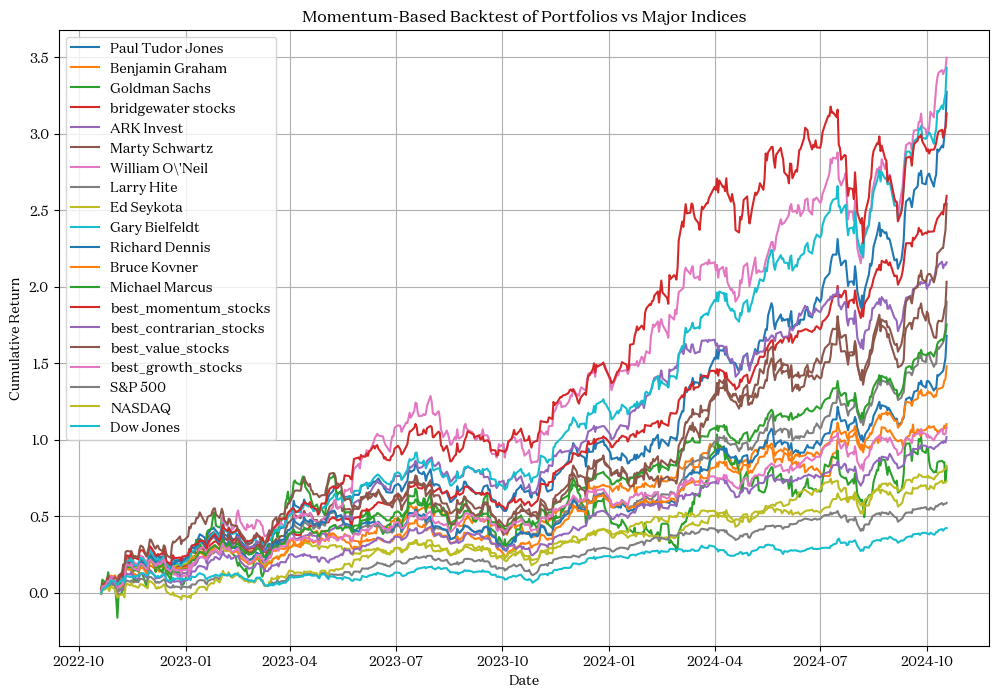

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load the portfolio dataframe to inspect its structure
file_path = '/Users/chengyixu/Library/CloudStorage/OneDrive-Personal/个人投资 & 学习/IB Invest/final 2 copy/1011-2/1012_port_stock/portfolio_df.csv'
portfolio_df = pd.read_csv(file_path)

# Start and end date for backtesting (2 years back)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - pd.DateOffset(years=2)).strftime('%Y-%m-%d')

# Prepare a dict to store the tickers for each portfolio
portfolios = {}

# Iterate over each portfolio column to collect the tickers
for column in portfolio_df.columns[2:]:  # Skipping first two columns which aren't portfolios
    tickers = portfolio_df[column].dropna().unique().tolist()
    if len(tickers) > 0:  # Only include portfolios with at least 1 ticker
        portfolios[column] = tickers

# Define a function to download stock data and calculate momentum weights
def get_momentum_weights(tickers, start_date, end_date):
    if len(tickers) == 1:
        return pd.Series([1.0], index=tickers)  # 100% weight for single-ticker portfolios
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = data.pct_change().mean() * 252  # Annualized return (momentum)
    momentum_weights = returns / returns.sum()  # Normalize to get weights
    return momentum_weights

# Define a function to backtest each portfolio with momentum-based weights
def backtest_portfolios(portfolios, start_date, end_date):
    results = {}
    for portfolio_name, tickers in portfolios.items():
        try:
            # Get momentum-based weights
            weights = get_momentum_weights(tickers, start_date, end_date)
            # Download data for the tickers
            data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
            # Calculate portfolio returns
            weighted_returns = data.pct_change().dot(weights)
            cumulative_return = (1 + weighted_returns).cumprod() - 1
            results[portfolio_name] = cumulative_return
        except Exception as e:
            print(f"Error processing {portfolio_name}: {e}")
            continue
    return results

# Backtest the portfolios
backtest_results = backtest_portfolios(portfolios, start_date, end_date)

# Convert results to DataFrame for easy viewing
backtest_df = pd.DataFrame(backtest_results)

# Define major index tickers (S&P 500, NASDAQ, Dow Jones)
index_tickers = ['^GSPC', '^IXIC', '^DJI']

# Download index data
index_data = yf.download(index_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate cumulative returns for each index
index_cumulative_returns = {}
for ticker, column_name in zip(index_tickers, ['S&P 500', 'NASDAQ', 'Dow Jones']):
    index_returns = index_data[ticker].pct_change()
    index_cumulative_returns[column_name] = (1 + index_returns).cumprod() - 1

# Add the index cumulative returns to the backtest DataFrame
for index_name, cumulative_return in index_cumulative_returns.items():
    backtest_df[index_name] = cumulative_return

# Plot the cumulative return for each portfolio and major indices
plt.figure(figsize=(12, 8))
for column in backtest_df.columns:
    plt.plot(backtest_df.index, backtest_df[column], label=column)

plt.title('Momentum-Based Backtest of Portfolios vs Major Indices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


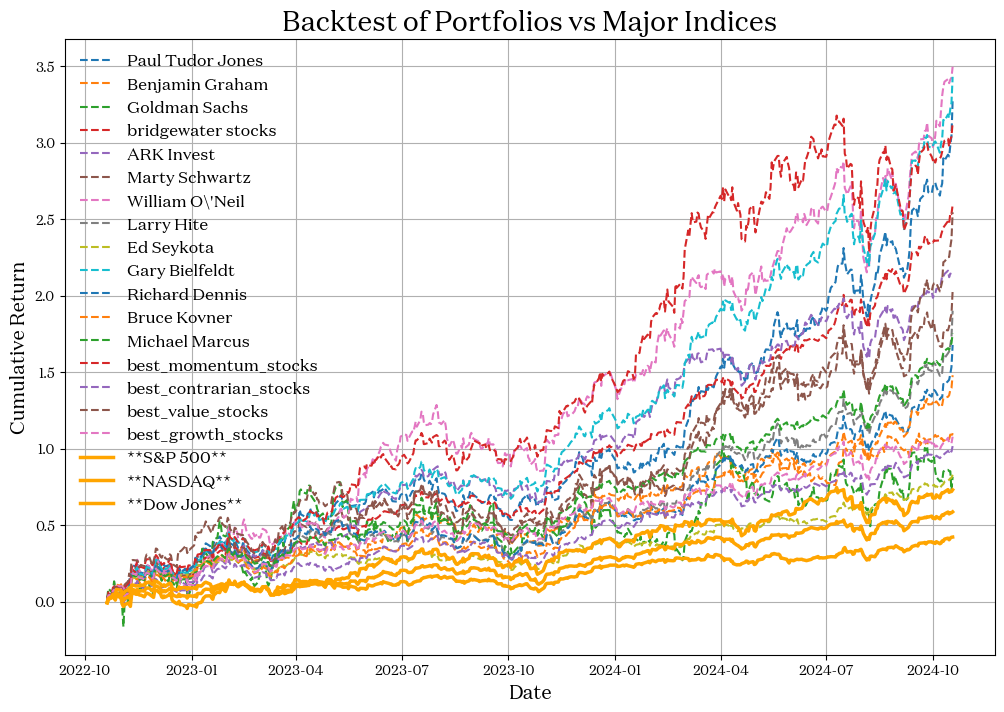

In [ ]:
import matplotlib.pyplot as plt

# Define major index columns for bold and highlighting
major_indexes = ['S&P 500', 'NASDAQ', 'Dow Jones']

# Plot the cumulative return for each portfolio with transparent background and custom font
plt.figure(figsize=(12, 8), facecolor='none')

# Iterate through each column and plot
for column in backtest_df.columns:
    if column in major_indexes:
        plt.plot(backtest_df.index, backtest_df[column], label=f'**{column}**', linewidth=2.5, linestyle='-', color='orange')  # Bold and highlight major indexes
    else:
        plt.plot(backtest_df.index, backtest_df[column], label=column, linewidth=1.5, linestyle='--')  # Normal lines for other portfolios

# Add title and axis labels with Domaine Text font
plt.title('Backtest of Portfolios vs Major Indices', fontname='Domaine Text', fontsize=20)
plt.xlabel('Date', fontname='Domaine Text', fontsize=14)
plt.ylabel('Cumulative Return', fontname='Domaine Text', fontsize=14)

# Customize legend to make it bold and larger for major indices
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Add grid lines
plt.grid(True)

# Save the figure with a transparent background
plt.savefig('momentum_backtest_transparent.png', transparent=True)

# Display the plot
plt.show()


In [ ]:
#import yahooquery as yq
#import pandas as pd

#fund = yq.Ticker('xlf')
#fund.fund_holding_info.keys()
#dict_keys(['hasgx'])

#df = pd.DataFrame(fund.fund_holding_info['xlf']['holdings'])

#df


@AliCodesJava @WillMo2198
Here you go:

from lxml import html
import requests
from collections import OrderedDict

class ticker_data_object:

'''
Instantiation of ticker_data_object will set attributes and assign their value(s) from the URL response keys and values
stored to ticker data dictionary passed while using valid attribute names mapped in ticker_data_translator dictionary
to keys retrieved from URL response
'''
def __init__(self, data=None):
    if data is not None:
        for key, value in data.items():
            attribute = [translator_value for translator_key, translator_value in ticker_data_translator.items() if key.startswith(translator_key) == True][0]
            setattr(self, attribute, value)
def get_ticker_data_translator():

'''
Map valid attribute names to use for each key retrived from the URL response

NOTE: Keys below are substrings used to locate actual key names restrieved from URL responses
      some of which may terminate with dynamic info such as a specifica date

'''
return {
        'Current Price': 'current_price',
        'Previous Close': 'previous_close', 
        'Open': 'open_price',
        'Bid': 'bid',
        'Ask': 'ask',
        'Day\'s Range': 'days_range',
        '52 Week Range': 'fifty_two_week_range',
        'Volume': 'volume',
        'Avg. Volume': 'avg_volume',
        'Market Cap': 'market_cap',
        'Beta (5Y Monthly)': 'beta_5y_monthly',
        'PE Ratio (TTM)': 'pe_ratio_ttm',
        'EPS (TTM)': 'eps_ttm',
        'Earnings Date': 'earnings_date',
        'Forward Dividend & Yield': 'forward_dividend_and_yield',
        'Ex-Dividend Date': 'ex_dividend_date',
        '1y Target Est': 'one_year_target_est',
        'Market Cap (intraday)': 'market_cap_intraday',
        'Enterprise Value': 'enterprise_value',
        'Trailing P/E': 'trailing_pe',
        'Forward P/E': 'forward_pe',
        'PEG Ratio (5 yr expected)': 'peg_ratio_5_yr_expected',
        'Price/Sales (ttm)': 'price_to_sales_ttm',
        'Price/Book (mrq)': 'price_to_book_mrq',
        'Enterprise Value/Revenue': 'enterprise_value_to_revenue',
        'Enterprise Value/EBITDA': 'enterprise_value_to_revenue',
        '52-Week Change': 'fifty_two_week_change',
        'S&P500 52-Week Change': 'sp500_52_wee_change',
        '52 Week High': 'fifty_two_week_high',
        '52 Week Low': 'fifty_two_week_low',
        '50-Day Moving Average': 'fifty_day_average',
        '200-Day Moving Average': 'two_hundred_day_moving_average',
        'Avg Vol (3 month)': 'avg_vol_3_month',
        'Avg Vol (10 day)': 'avg_vol_10_day',
        'Shares Outstanding': 'shares_outstanding',
        'Implied Shares Outstanding': 'implied_shares_oustanding',
        'Float': 'float_amount',
        '% Held by Insiders': 'percentage_held_by_insiders',
        '% Held by Institutions': 'percentage_held_by_institutions',
        'Shares Short': 'shares_short',
        'Short Ratio': 'short_ratio',
        'Short % of Float': 'short_percentage_of_float',
        'Short % of Shares Outstanding': 'short_percentage_of_shares_outstanding',
        'Shares Short (prior month': 'shares_short_prior_month',
        'Forward Annual Dividend Rate': 'forward_annual_dividend_rate',
        'Forward Annual Dividend Yield': 'forward_annual_dividend_yield',
        'Trailing Annual Dividend Rate': 'trailing_annual_dividend_rate',
        'Trailing Annual Dividend Yield': 'trailing_annual_dividend_yield',
        '5 Year Average Dividend Yield': 'five_year_average_dividend_yield',
        'Payout Ratio': 'payout_ratio',
        'Dividend Date': 'dividend_date',
        'Ex-Dividend Date': 'ex_dividend_date',
        'Last Split Factor': 'last_split_factor',
        'Last Split Date': 'last_split_date',
        'Fiscal Year Ends': 'fiscal_year_ends',
        'Most Recent Quarter (mrq)': 'most_recent_quarter_mrq',
        'Profit Margin': 'profit_margin',
        'Operating Margin (ttm)': 'operating_margin_ttm',
        'Return on Assets (ttm)': 'return_on_assets_ttm',
        'Return on Equity (ttm)': 'return_on_equity_ttm',
        'Revenue (ttm)': 'revenue_ttm',
        'Revenue Per Share (ttm)': 'revenue_per_share_ttm',
        'Quarterly Revenue Growth (yoy)': 'quarterly_revenue_growth_yoy',
        'Gross Profit (ttm)': 'gross_profit_ttm',
        'EBITDA': 'ebitda',
        'Net Income Avi to Common (ttm)': 'net_income_avi_to_common_ttm',
        'Diluted EPS (ttm)': 'diluted_eps_ttm',
        'Quarterly Earnings Growth (yoy)': 'quarterly_earnings_growth_yoy',
        'Total Cash (mrq)': 'total_cash_mrq',
        'Total Cash Per Share (mrq)': 'total_cash_per_share_mrq',
        'Total Debt (mrq)': 'total_debt_mrq',
        'Total Debt/Equity (mrq)': 'total_debt_to_equity_mrq',
        'Current Ratio (mrq)': 'current_ratio_mrq',
        'Book Value Per Share (mrq)': 'book_value_per_share_mrq',
        'Operating Cash Flow (ttm)': 'operating_cash_flow_ttm',
        'Levered Free Cash Flow (ttm)': 'levered_free_cash_flow_ttm',
        'Ticker': 'ticker'
        }
def get_ticker_data(ticker):
http_headers = {"accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,/;q=0.8,application/signed-exchange;v=b3;q=0.9",
"accept-encoding": "gzip, deflate, br",
"accept-language": "en-GB,en;q=0.9,en-US;q=0.8,ml;q=0.7",
"cache-control": "max-age=0",
"dnt": "1",
"sec-fetch-dest": "document",
"sec-fetch-mode": "navigate",
"sec-fetch-site": "none",
"sec-fetch-user": "?1",
"upgrade-insecure-requests": "1",
"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"}

# GET & Parse Response from Summary URL to ticker_data dictionary
summary_url = "https://finance.yahoo.com/quote/%s?p=%s" % (ticker, ticker)
summary_response = requests.get(summary_url, verify=True, headers=http_headers, timeout=30)
summary_parser = html.fromstring(summary_response.text)
current_price = summary_parser.xpath('//*[@id="quote-header-info"]/div[3]/div[1]/div[1]/fin-streamer[1]/text()')
summary_table = summary_parser.xpath('//div[contains(@data-test,"summary-table")]//tr')
ticker_data = OrderedDict()
ticker_data.update({'Current Price': current_price[0]})
for table_data in summary_table:
    raw_table_key = table_data.xpath('.//td[1]//text()')
    raw_table_value = table_data.xpath('.//td[2]//text()')
    table_key = ''.join(raw_table_key).strip()
    table_value = ''.join(raw_table_value).strip()
    ticker_data.update({table_key: table_value})

# GET & Parse Response from Statistics URL to ticker_data dictionary
statistics_url = "https://finance.yahoo.com/quote/%s/key-statistics?p=%s" % (ticker, ticker)
statistics_response = requests.get(statistics_url, verify=True, headers=http_headers, timeout=30)
statistics_parser = html.fromstring(statistics_response.text)
statistics_table = statistics_parser.xpath('//div[contains(@class,"Mstart(a) Mend(a)")]//tr')
for table_data in statistics_table:
    raw_table_key = table_data.xpath('.//td[1]//text()')
    raw_table_value = table_data.xpath('.//td[2]//text()')
    table_key = ''.join(raw_table_key).strip()
    table_value = ''.join(raw_table_value).strip()
    ticker_data.update({table_key: table_value})

# Add Ticker key to ticker_data dictionary
ticker_data.update({'Ticker': ticker})

# Return TickerData object from ticker_data disctionary
return ticker_data_object(ticker_data)
if name == "main":

# Get ticker_data_translator dictionary
ticker_data_translator = get_ticker_data_translator()

stock_tickers_list = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']

for stock_ticker in stock_tickers_list:
    ticker_data = get_ticker_data(stock_ticker)
    print(ticker_data.ticker + " current price: " + ticker_data.current_price)